# ASTEROID DIAMETER PREDICTION AND PHA CLASSIFICATION

# Loading Data into Pandas DataFrame

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:\\Capstone_Project_1\\asteroid_data.csv")

C:\Users\Pooja\AppData\Local\Temp\ipykernel_7500\1498995415.py:1: DtypeWarning: Columns (1,7,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("D:\\Capstone_Project_1\\asteroid_data.csv")


#<span style="font-size: 18px;">Here we see that there is warning which tells that these features have mixed datatypes.This has to be addressed.</span>

In [3]:
data

,full_name,name,neo,pha,H,G,diameter,extent,albedo,rot_per,...,n,tp,per,per_y,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),Ceres,N,N,3.33,0.12,939.400,964.4 x 964.2 x 891.8,0.0900,9.074170,...,0.2142,2459920.37,1680.0,4.60,1.590,2.09,MBA,9520.0,0,0.43153
1,2 Pallas (A802 FA),Pallas,N,N,4.11,0.11,513.000,568x532x448,0.1550,7.813221,...,0.2139,2460010.50,1680.0,4.61,1.230,1.85,MBA,79390.0,0,0.35570
2,3 Juno (A804 RA),Juno,N,N,5.12,0.32,246.596,NaN,0.2140,7.210000,...,0.2259,2460036.83,1590.0,4.36,1.040,2.19,MBA,79466.0,0,0.34530
3,4 Vesta (A807 FA),Vesta,N,N,3.20,0.32,525.400,572.6 x 557.2 x 446.4,0.4228,5.342128,...,0.2715,2459575.12,1330.0,3.63,1.140,2.47,MBA,25743.0,0,0.40095
4,5 Astraea (A845 XA),Astraea,N,N,7.01,NaN,106.699,NaN,0.2740,16.806000,...,0.2382,2460436.30,1510.0,4.14,1.100,1.96,MBA,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),NaN,N,N,18.30,NaN,1.870,NaN,0.0730,NaN,...,0.2171,2460389.46,1660.0,4.54,1.120,1.82,MBA,6557.0,1,0.52751
139704,(2019 BY5),NaN,N,N,17.10,NaN,2.182,NaN,0.0540,NaN,...,0.2200,2459982.46,1640.0,4.48,0.985,2.01,MBA,3763.0,0,0.42858
139705,(2019 BX6),NaN,N,N,17.45,NaN,1.688,NaN,NaN,NaN,...,0.2245,2459941.00,1600.0,4.39,1.060,2.11,MBA,7084.0,0,0.46238
139706,(2019 BB7),NaN,N,N,16.80,NaN,2.887,NaN,0.1110,NaN,...,0.2117,2460429.02,1700.0,4.66,1.360,1.77,MBA,4704.0,0,0.51827


In [4]:
data.head()

,full_name,name,neo,pha,H,G,diameter,extent,albedo,rot_per,...,n,tp,per,per_y,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),Ceres,N,N,3.33,0.12,939.400,964.4 x 964.2 x 891.8,0.0900,9.074170,...,0.2142,2459920.37,1680.0,4.60,1.59,2.09,MBA,9520.0,0,0.43153
1,2 Pallas (A802 FA),Pallas,N,N,4.11,0.11,513.000,568x532x448,0.1550,7.813221,...,0.2139,2460010.50,1680.0,4.61,1.23,1.85,MBA,79390.0,0,0.35570
2,3 Juno (A804 RA),Juno,N,N,5.12,0.32,246.596,NaN,0.2140,7.210000,...,0.2259,2460036.83,1590.0,4.36,1.04,2.19,MBA,79466.0,0,0.34530
3,4 Vesta (A807 FA),Vesta,N,N,3.20,0.32,525.400,572.6 x 557.2 x 446.4,0.4228,5.342128,...,0.2715,2459575.12,1330.0,3.63,1.14,2.47,MBA,25743.0,0,0.40095
4,5 Astraea (A845 XA),Astraea,N,N,7.01,NaN,106.699,NaN,0.2740,16.806000,...,0.2382,2460436.30,1510.0,4.14,1.10,1.96,MBA,64243.0,0,0.52133


# Exploratory Data Analysis(EDA)

# 1.Data Statistics Summary

In [5]:
df=data.copy()
df

,full_name,name,neo,pha,H,G,diameter,extent,albedo,rot_per,...,n,tp,per,per_y,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),Ceres,N,N,3.33,0.12,939.400,964.4 x 964.2 x 891.8,0.0900,9.074170,...,0.2142,2459920.37,1680.0,4.60,1.590,2.09,MBA,9520.0,0,0.43153
1,2 Pallas (A802 FA),Pallas,N,N,4.11,0.11,513.000,568x532x448,0.1550,7.813221,...,0.2139,2460010.50,1680.0,4.61,1.230,1.85,MBA,79390.0,0,0.35570
2,3 Juno (A804 RA),Juno,N,N,5.12,0.32,246.596,NaN,0.2140,7.210000,...,0.2259,2460036.83,1590.0,4.36,1.040,2.19,MBA,79466.0,0,0.34530
3,4 Vesta (A807 FA),Vesta,N,N,3.20,0.32,525.400,572.6 x 557.2 x 446.4,0.4228,5.342128,...,0.2715,2459575.12,1330.0,3.63,1.140,2.47,MBA,25743.0,0,0.40095
4,5 Astraea (A845 XA),Astraea,N,N,7.01,NaN,106.699,NaN,0.2740,16.806000,...,0.2382,2460436.30,1510.0,4.14,1.100,1.96,MBA,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),NaN,N,N,18.30,NaN,1.870,NaN,0.0730,NaN,...,0.2171,2460389.46,1660.0,4.54,1.120,1.82,MBA,6557.0,1,0.52751
139704,(2019 BY5),NaN,N,N,17.10,NaN,2.182,NaN,0.0540,NaN,...,0.2200,2459982.46,1640.0,4.48,0.985,2.01,MBA,3763.0,0,0.42858
139705,(2019 BX6),NaN,N,N,17.45,NaN,1.688,NaN,NaN,NaN,...,0.2245,2459941.00,1600.0,4.39,1.060,2.11,MBA,7084.0,0,0.46238
139706,(2019 BB7),NaN,N,N,16.80,NaN,2.887,NaN,0.1110,NaN,...,0.2117,2460429.02,1700.0,4.66,1.360,1.77,MBA,4704.0,0,0.51827


#<span style="font-size: 24px;">The Feature "name" doesn't add any meaning to diameter prediction,hence it can be dropped.</span>

In [6]:
df1=df.drop(['name'],axis=1)
df1

,full_name,neo,pha,H,G,diameter,extent,albedo,rot_per,GM,...,n,tp,per,per_y,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),N,N,3.33,0.12,939.400,964.4 x 964.2 x 891.8,0.0900,9.074170,62.628400,...,0.2142,2459920.37,1680.0,4.60,1.590,2.09,MBA,9520.0,0,0.43153
1,2 Pallas (A802 FA),N,N,4.11,0.11,513.000,568x532x448,0.1550,7.813221,13.630000,...,0.2139,2460010.50,1680.0,4.61,1.230,1.85,MBA,79390.0,0,0.35570
2,3 Juno (A804 RA),N,N,5.12,0.32,246.596,NaN,0.2140,7.210000,NaN,...,0.2259,2460036.83,1590.0,4.36,1.040,2.19,MBA,79466.0,0,0.34530
3,4 Vesta (A807 FA),N,N,3.20,0.32,525.400,572.6 x 557.2 x 446.4,0.4228,5.342128,17.288245,...,0.2715,2459575.12,1330.0,3.63,1.140,2.47,MBA,25743.0,0,0.40095
4,5 Astraea (A845 XA),N,N,7.01,NaN,106.699,NaN,0.2740,16.806000,NaN,...,0.2382,2460436.30,1510.0,4.14,1.100,1.96,MBA,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),N,N,18.30,NaN,1.870,NaN,0.0730,NaN,NaN,...,0.2171,2460389.46,1660.0,4.54,1.120,1.82,MBA,6557.0,1,0.52751
139704,(2019 BY5),N,N,17.10,NaN,2.182,NaN,0.0540,NaN,NaN,...,0.2200,2459982.46,1640.0,4.48,0.985,2.01,MBA,3763.0,0,0.42858
139705,(2019 BX6),N,N,17.45,NaN,1.688,NaN,NaN,NaN,NaN,...,0.2245,2459941.00,1600.0,4.39,1.060,2.11,MBA,7084.0,0,0.46238
139706,(2019 BB7),N,N,16.80,NaN,2.887,NaN,0.1110,NaN,NaN,...,0.2117,2460429.02,1700.0,4.66,1.360,1.77,MBA,4704.0,0,0.51827


#<span style="font-size: 24px;">Here the Dependent variable is Diameter </span>

In [7]:
df1.shape

(139708, 36)

In [8]:
df1.columns

Index(['full_name', 'neo', 'pha', 'H', 'G', 'diameter', 'extent', 'albedo',
       'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'H_sigma',
       'diameter_sigma', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'tp', 'per', 'per_y', 'moid', 'moid_jup', 'class', 'data_arc',
       'condition_code', 'rms'],
      dtype='object')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139708 entries, 0 to 139707
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       139708 non-null  object 
 1   neo             139708 non-null  object 
 2   pha             139708 non-null  object 
 3   H               138594 non-null  float64
 4   G               119 non-null     float64
 5   diameter        139708 non-null  float64
 6   extent          19 non-null      object 
 7   albedo          138569 non-null  float64
 8   rot_per         19264 non-null   float64
 9   GM              15 non-null      float64
 10  BV              1007 non-null    float64
 11  UB              966 non-null     float64
 12  IR              1 non-null       float64
 13  spec_B          1414 non-null    object 
 14  spec_T          966 non-null     object 
 15  H_sigma         2631 non-null    float64
 16  diameter_sigma  139583 non-null  float64
 17  epoch     

#<span style="font-size: 24px;">Continous/Numerical and Categorical/Discrete Variables</span>

In [10]:
cat_cols=df1.select_dtypes(include=['object']).columns.to_list()
cont_cols=[i for i in df1.columns if i not in cat_cols]

In [11]:
cat_cols

['full_name', 'neo', 'pha', 'extent', 'spec_B', 'spec_T', 'class']

In [12]:
cont_cols

['H',
 'G',
 'diameter',
 'albedo',
 'rot_per',
 'GM',
 'BV',
 'UB',
 'IR',
 'H_sigma',
 'diameter_sigma',
 'epoch',
 'e',
 'a',
 'q',
 'i',
 'om',
 'w',
 'ma',
 'ad',
 'n',
 'tp',
 'per',
 'per_y',
 'moid',
 'moid_jup',
 'data_arc',
 'condition_code',
 'rms']

In [13]:
df1.describe()

,H,G,diameter,albedo,rot_per,GM,BV,UB,IR,H_sigma,...,ad,n,tp,per,per_y,moid,moid_jup,data_arc,condition_code,rms
count,138594.000000,119.000000,139708.000000,138569.000000,19264.000000,1.500000e+01,1007.000000,966.000000,1.00,2631.000000,...,139708.000000,139708.000000,1.397080e+05,1.397080e+05,139708.000000,139708.000000,139708.000000,139683.000000,139708.000000,139708.000000
mean,15.352342,0.179076,5.457189,0.130070,31.403305,7.221682e+00,0.768836,0.364093,-0.33,0.305580,...,3.246343,0.218882,2.459732e+06,1.791538e+03,4.905024,1.419095,2.049259,10156.767867,0.103122,0.519493
std,1.419058,0.133822,9.305528,0.110338,84.314215,1.626088e+01,0.088303,0.095659,NaN,0.103657,...,2.888508,0.060228,6.642237e+02,9.304166e+03,25.478303,0.516136,0.478788,5945.925622,0.877247,0.061549
min,3.200000,-0.250000,0.002500,0.001000,0.008500,2.100000e-09,0.580000,0.120000,-0.33,0.000000,...,1.000000,0.000126,2.426218e+06,1.810000e+02,0.496000,0.000109,0.000416,1.000000,0.000000,0.055102
25%,14.620000,0.100000,2.762000,0.053000,4.813625,2.230161e-04,0.700000,0.289000,-0.33,0.240000,...,2.890000,0.180700,2.459349e+06,1.490000e+03,4.070000,1.080000,1.800000,7297.000000,0.000000,0.485240
50%,15.440000,0.190000,3.948000,0.078000,8.263065,4.910000e-01,0.743000,0.360000,-0.33,0.300000,...,3.190000,0.214900,2.459750e+06,1.680000e+03,4.590000,1.390000,2.070000,8550.000000,0.000000,0.519490
75%,16.230000,0.250000,5.730000,0.188000,19.612975,6.000000e+00,0.849500,0.438750,-0.33,0.360000,...,3.490000,0.242300,2.460178e+06,1.990000e+03,5.450000,1.700000,2.350000,10729.000000,0.000000,0.553640
max,29.900000,0.600000,939.400000,1.000000,1880.000000,6.262840e+01,1.077000,0.655000,-0.33,0.810000,...,781.390000,1.989000,2.468617e+06,2.850000e+06,7810.000000,39.400000,35.600000,79466.000000,9.000000,2.506000


#<span style="font-size: 24px;">From the data description it is clear that there are some missing values in certain features that has to be either replaced or removed.</span>

# 2.Data Cleaning

#<span style="font-size: 24px;">1.Handling Datatype inconsistencies in the columns where warning is thrown</span>

#<span style="font-size: 18px;">The columns"name,extent,spec_b,spec_t" have mixed datatypes."name" is dropped and other 3 has to be handled.</span>

In [14]:
df1.columns

Index(['full_name', 'neo', 'pha', 'H', 'G', 'diameter', 'extent', 'albedo',
       'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'H_sigma',
       'diameter_sigma', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'tp', 'per', 'per_y', 'moid', 'moid_jup', 'class', 'data_arc',
       'condition_code', 'rms'],
      dtype='object')

In [15]:
columns_with_mixed_dtype=df1.columns[[6,13,14]].values
columns_with_mixed_dtype

array(['extent', 'spec_B', 'spec_T'], dtype=object)

In [16]:
#looping through these columns and getting the value counts for the dtypes
for i in columns_with_mixed_dtype:
    print(f"Column name : {i}")
    val_cnt=df1[i].apply(type).value_counts()
    print(val_cnt)
    print('\n')

Column name : extent
<class 'float'>    139689
<class 'str'>          19
Name: extent, dtype: int64


Column name : spec_B
<class 'float'>    138294
<class 'str'>        1414
Name: spec_B, dtype: int64


Column name : spec_T
<class 'float'>    138742
<class 'str'>         966
Name: spec_T, dtype: int64




In [17]:
#check if these columns are affected by missing values
for i in columns_with_mixed_dtype:
    print(f"Column name : {i}")
    print(df1[i].isnull().sum())
    print('\n')

Column name : extent
139689


Column name : spec_B
138294


Column name : spec_T
138742




#<span style="font-size: 25px;">The datatype inconsistency is due to the missing values present in these columns.</span>

#<span style="font-size: 24px;">2.Checking and Handling Duplicate rows</span>

In [18]:
df1[df1.duplicated()].shape

(0, 36)

#<span style="font-size: 20px;">There are no duplicate records in the dataset</span>

# 3. Missing Value Analysis

#<span style="font-size: 24px;">1.Graphical Analysis</span>

#<span style="font-size: 18px;">"missingno" library of python can be used to graphically look at missing value status of each feature</span>

In [19]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [20]:
import missingno as msno

#<span style="font-size: 18px;">Matrix plot for finding the percentage of missing values of each feature</span>

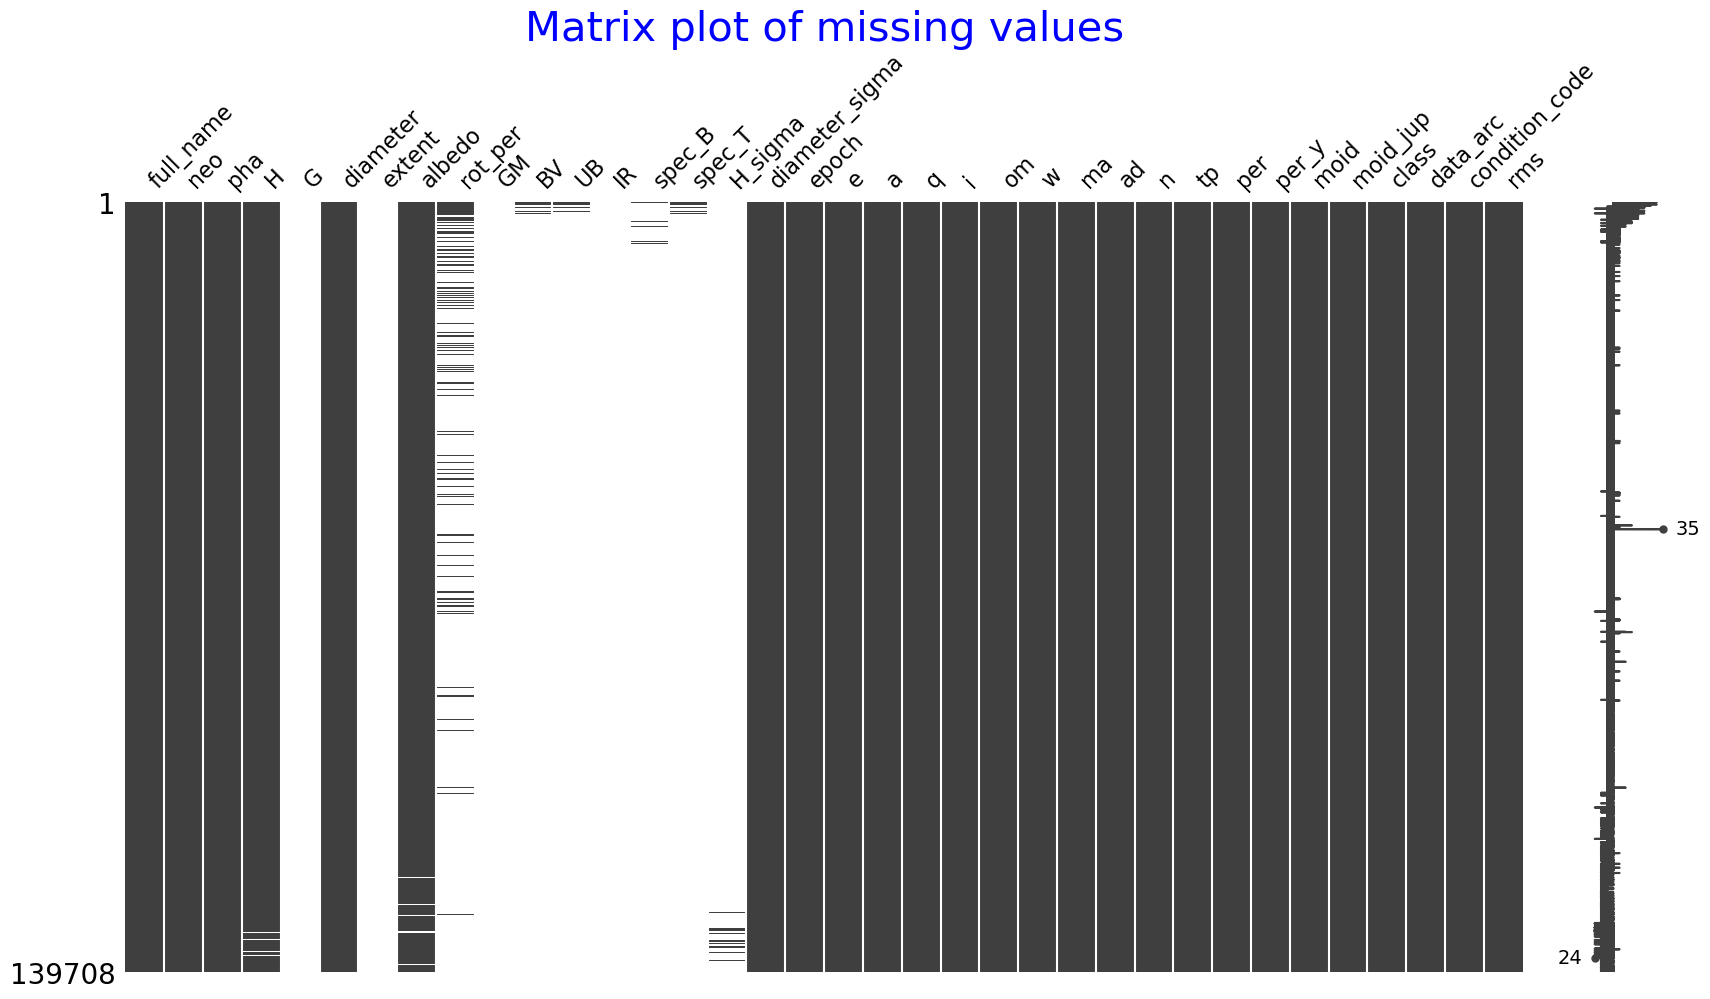

In [21]:
missing_values=msno.matrix(df1,figsize=(20,10))
plt.title("Matrix plot of missing values",fontsize=30,color='blue')
plt.show()

#<span style="font-size: 18px;">Bar plot for finding the percentage of missing values of each feature</span>

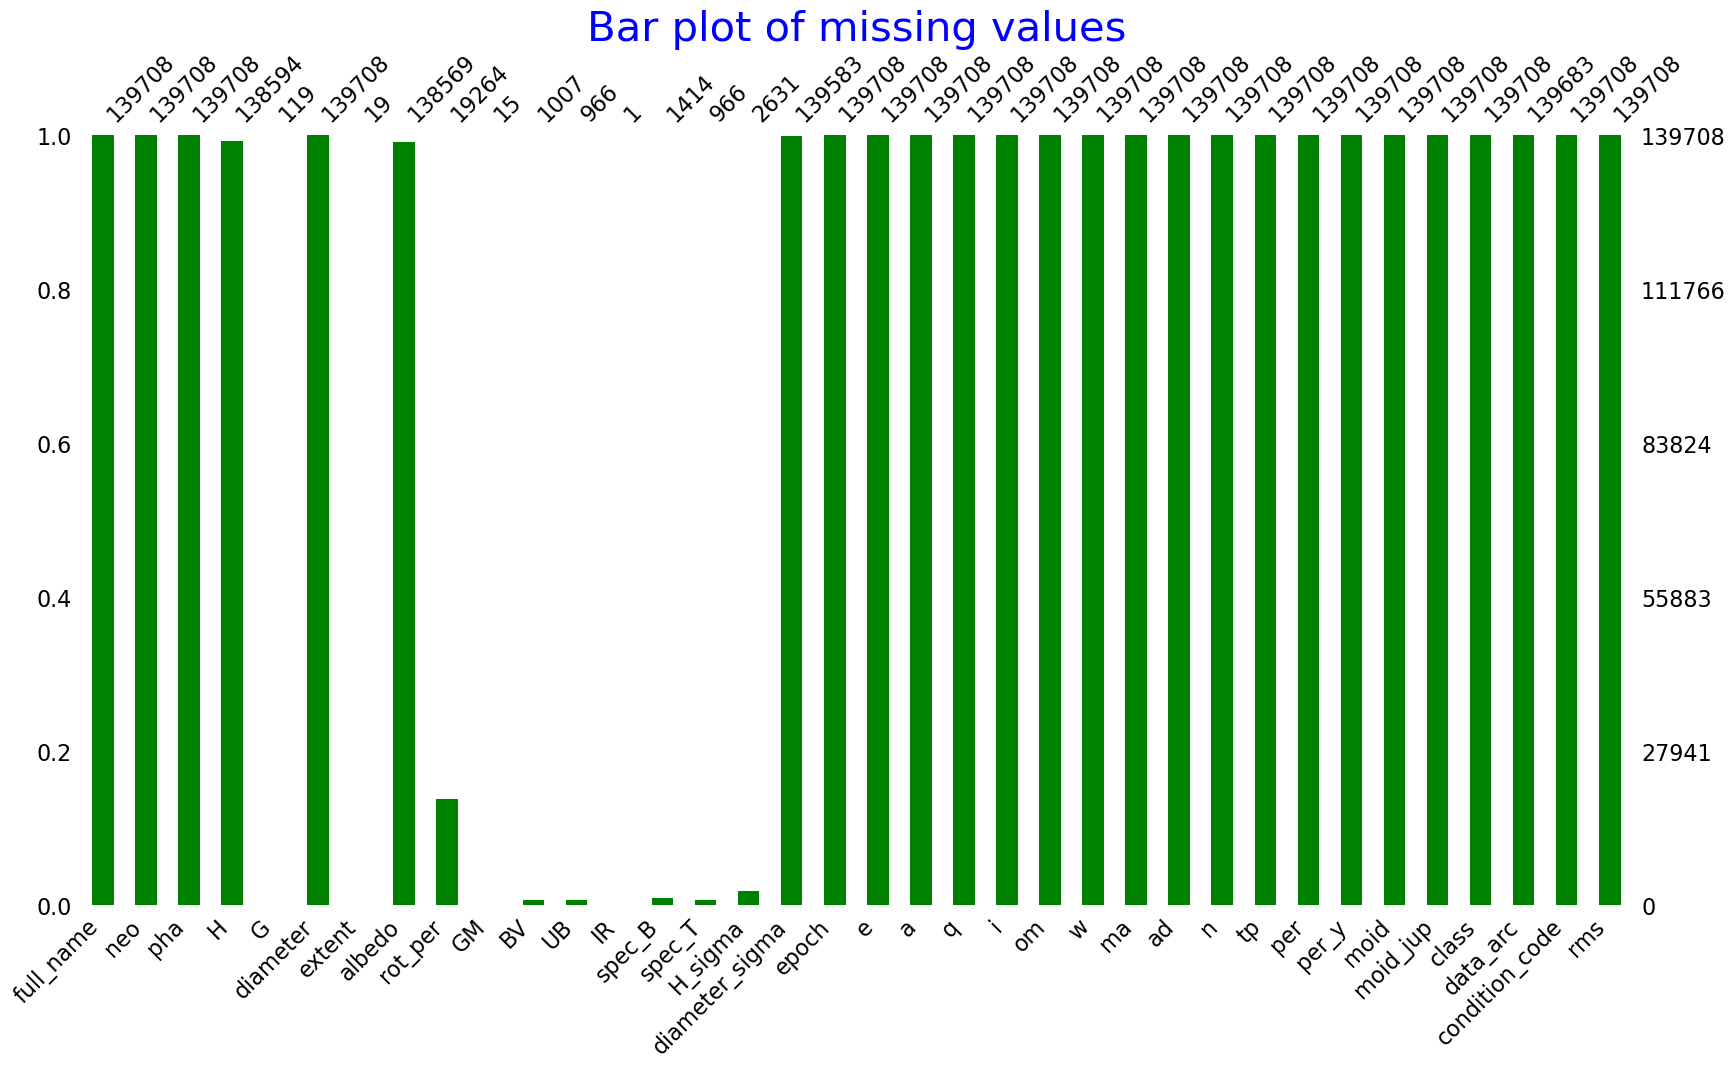

In [22]:
missing_values_1=msno.bar(df1,figsize=(20,10),color='green')
plt.title("Bar plot of missing values",fontsize=30,color='blue')
plt.show()

#<span style="font-size: 18px;">The features "G,GM,IR,extent,UB,spec_T,BV,spec_B,H_sigma,rot_per" have more missing values and the features "albedo,H,diameter_sigma,data_arc" have less number of missing values.</span>

#<span style="font-size: 24px;">2.Statistical Analysis</span>

#<span style="font-size: 24px;">Count and Percentage of Missing values in each feature</span>

In [23]:
missing_count=df1.isnull().sum()
missing_count

full_name              0
neo                    0
pha                    0
H                   1114
G                 139589
diameter               0
extent            139689
albedo              1139
rot_per           120444
GM                139693
BV                138701
UB                138742
IR                139707
spec_B            138294
spec_T            138742
H_sigma           137077
diameter_sigma       125
epoch                  0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     0
ad                     0
n                      0
tp                     0
per                    0
per_y                  0
moid                   0
moid_jup               0
class                  0
data_arc              25
condition_code         0
rms                    0
dtype: int64

In [24]:
missing_percent=(df1.isnull().mean())*100
missing_percent

full_name          0.000000
neo                0.000000
pha                0.000000
H                  0.797377
G                 99.914822
diameter           0.000000
extent            99.986400
albedo             0.815272
rot_per           86.211241
GM                99.989263
BV                99.279211
UB                99.308558
IR                99.999284
spec_B            98.987889
spec_T            99.308558
H_sigma           98.116786
diameter_sigma     0.089472
epoch              0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000000
ad                 0.000000
n                  0.000000
tp                 0.000000
per                0.000000
per_y              0.000000
moid               0.000000
moid_jup           0.000000
class              0.000000
data_arc           0.017894
condition_code     0.000000
rms                0

In [25]:
new_df=pd.DataFrame()
new_df['Missing count']=missing_count
new_df['Missing Percentage']=missing_percent
new_df

,Missing count,Missing Percentage
full_name,0,0.000000
neo,0,0.000000
pha,0,0.000000
H,1114,0.797377
G,139589,99.914822
diameter,0,0.000000
extent,139689,99.986400
albedo,1139,0.815272
rot_per,120444,86.211241
GM,139693,99.989263


In [26]:
new_df_1=new_df[new_df['Missing count']!=0]
new_df_1=new_df_1.sort_values(by='Missing count',ascending=False)
new_df_1

,Missing count,Missing Percentage
IR,139707,99.999284
GM,139693,99.989263
extent,139689,99.986400
G,139589,99.914822
UB,138742,99.308558
spec_T,138742,99.308558
BV,138701,99.279211
spec_B,138294,98.987889
H_sigma,137077,98.116786
rot_per,120444,86.211241


#<span style="font-size: 18px;">From the above we can infer that the features "IR, GM, extent, G, UB, spec_T, BV, spec_B, H_sigma,rot_per" has a missing values percentage greater than '40'.Hence these features can be dropped .And the features whose missing values percentage is lesser than 40(albedo,H,diameter_sigma,data_arc) can be imputed with values based on their distribution.</span>

In [27]:
df1.columns

Index(['full_name', 'neo', 'pha', 'H', 'G', 'diameter', 'extent', 'albedo',
       'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'H_sigma',
       'diameter_sigma', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'tp', 'per', 'per_y', 'moid', 'moid_jup', 'class', 'data_arc',
       'condition_code', 'rms'],
      dtype='object')

In [28]:
columns_to_drop = ['G', 'extent', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'H_sigma']
df1.drop(columns_to_drop, axis=1, inplace=True)

In [29]:
df1

,full_name,neo,pha,H,diameter,albedo,diameter_sigma,epoch,e,a,...,n,tp,per,per_y,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),N,N,3.33,939.400,0.0900,0.20,2459800.5,0.0786,2.767,...,0.2142,2459920.37,1680.0,4.60,1.590,2.09,MBA,9520.0,0,0.43153
1,2 Pallas (A802 FA),N,N,4.11,513.000,0.1550,6.00,2459800.5,0.2300,2.769,...,0.2139,2460010.50,1680.0,4.61,1.230,1.85,MBA,79390.0,0,0.35570
2,3 Juno (A804 RA),N,N,5.12,246.596,0.2140,10.59,2459800.5,0.2568,2.670,...,0.2259,2460036.83,1590.0,4.36,1.040,2.19,MBA,79466.0,0,0.34530
3,4 Vesta (A807 FA),N,N,3.20,525.400,0.4228,0.20,2459800.5,0.0884,2.362,...,0.2715,2459575.12,1330.0,3.63,1.140,2.47,MBA,25743.0,0,0.40095
4,5 Astraea (A845 XA),N,N,7.01,106.699,0.2740,3.14,2459800.5,0.1890,2.578,...,0.2382,2460436.30,1510.0,4.14,1.100,1.96,MBA,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),N,N,18.30,1.870,0.0730,0.20,2459800.5,0.2460,2.742,...,0.2171,2460389.46,1660.0,4.54,1.120,1.82,MBA,6557.0,1,0.52751
139704,(2019 BY5),N,N,17.10,2.182,0.0540,0.28,2459800.5,0.2966,2.718,...,0.2200,2459982.46,1640.0,4.48,0.985,2.01,MBA,3763.0,0,0.42858
139705,(2019 BX6),N,N,17.45,1.688,NaN,0.48,2459800.5,0.2423,2.681,...,0.2245,2459941.00,1600.0,4.39,1.060,2.11,MBA,7084.0,0,0.46238
139706,(2019 BB7),N,N,16.80,2.887,0.1110,0.85,2459800.5,0.1594,2.788,...,0.2117,2460429.02,1700.0,4.66,1.360,1.77,MBA,4704.0,0,0.51827


# 4. Feature Analysis

In [30]:
df1.columns

Index(['full_name', 'neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma',
       'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per',
       'per_y', 'moid', 'moid_jup', 'class', 'data_arc', 'condition_code',
       'rms'],
      dtype='object')

#<span style="font-size: 20px;">Dropping the features "per_y" as it is redundant to ‘per’ and "diameter_sigma" which doesn't make any meaning to diameter prediction.</span>

In [31]:
df_new=df1.drop(['per_y','diameter_sigma'],axis=1)
df_new

,full_name,neo,pha,H,diameter,albedo,epoch,e,a,q,...,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),N,N,3.33,939.400,0.0900,2459800.5,0.0786,2.767,2.549,...,2.98,0.2142,2459920.37,1680.0,1.590,2.09,MBA,9520.0,0,0.43153
1,2 Pallas (A802 FA),N,N,4.11,513.000,0.1550,2459800.5,0.2300,2.769,2.133,...,3.41,0.2139,2460010.50,1680.0,1.230,1.85,MBA,79390.0,0,0.35570
2,3 Juno (A804 RA),N,N,5.12,246.596,0.2140,2459800.5,0.2568,2.670,1.985,...,3.36,0.2259,2460036.83,1590.0,1.040,2.19,MBA,79466.0,0,0.34530
3,4 Vesta (A807 FA),N,N,3.20,525.400,0.4228,2459800.5,0.0884,2.362,2.153,...,2.57,0.2715,2459575.12,1330.0,1.140,2.47,MBA,25743.0,0,0.40095
4,5 Astraea (A845 XA),N,N,7.01,106.699,0.2740,2459800.5,0.1890,2.578,2.090,...,3.06,0.2382,2460436.30,1510.0,1.100,1.96,MBA,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),N,N,18.30,1.870,0.0730,2459800.5,0.2460,2.742,2.067,...,3.42,0.2171,2460389.46,1660.0,1.120,1.82,MBA,6557.0,1,0.52751
139704,(2019 BY5),N,N,17.10,2.182,0.0540,2459800.5,0.2966,2.718,1.912,...,3.52,0.2200,2459982.46,1640.0,0.985,2.01,MBA,3763.0,0,0.42858
139705,(2019 BX6),N,N,17.45,1.688,NaN,2459800.5,0.2423,2.681,2.031,...,3.33,0.2245,2459941.00,1600.0,1.060,2.11,MBA,7084.0,0,0.46238
139706,(2019 BB7),N,N,16.80,2.887,0.1110,2459800.5,0.1594,2.788,2.344,...,3.23,0.2117,2460429.02,1700.0,1.360,1.77,MBA,4704.0,0,0.51827


In [32]:
df_new.shape

(139708, 24)

# 5. Visualization based Analysis

#<span style="font-size: 25px;">1.Univariate Analysis </span>

#Here we will analyse:

                1.How Target variable is distributed
                2.How Independent variabes are distributed

In [33]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Distribution plot of Diameter')

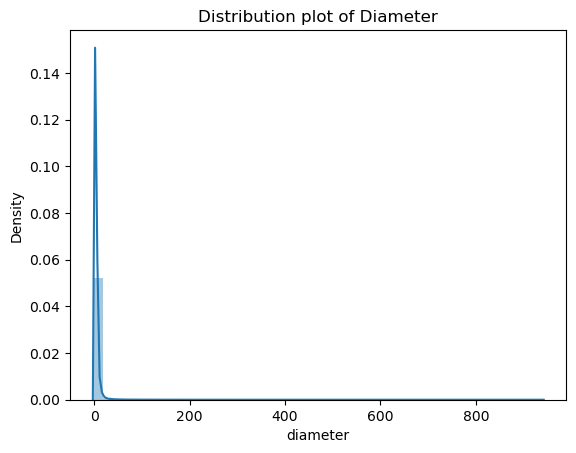

In [34]:
sns.distplot(df_new['diameter'])
plt.title('Distribution plot of Diameter')

#<span style="font-size: 23px;">Observation:
              
        - Target variable "Diameter" shows a skewed distribution.Majority of values are between 0-10.
        - Skewness-Positive/Right skew with tail in positive direction. 
</span>

Text(0.5, 1.0, 'Box-Plot of Diameter')

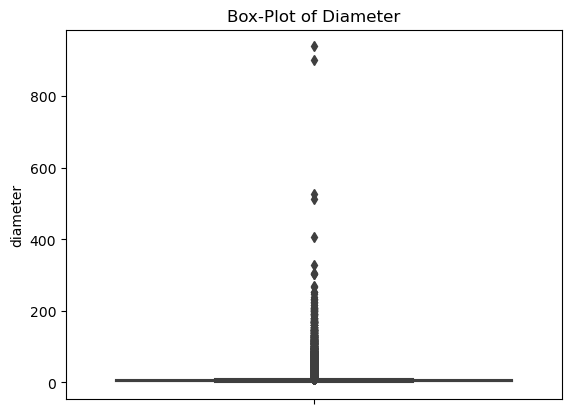

In [35]:
sns.boxplot(y=df_new['diameter'])
plt.title('Box-Plot of Diameter')

(0.0, 50.0)

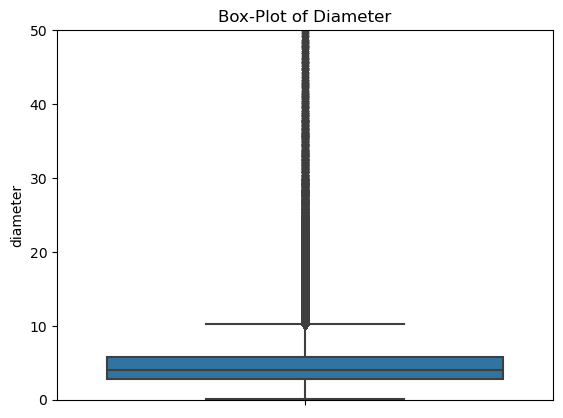

In [36]:
sns.boxplot(y=df_new['diameter'])
plt.title('Box-Plot of Diameter')
plt.ylim(0,50)

#<span style="font-size: 23px;">Observations:
    
    -There are some outliers in our case that has to be treated.
</span>

#<span style="font-size: 20px;">Applying log transformation on the target variable "diameter" .Log transformation is generally applied to numerical variables to treat the outliers.  </span>

In [37]:
df_new

,full_name,neo,pha,H,diameter,albedo,epoch,e,a,q,...,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),N,N,3.33,939.400,0.0900,2459800.5,0.0786,2.767,2.549,...,2.98,0.2142,2459920.37,1680.0,1.590,2.09,MBA,9520.0,0,0.43153
1,2 Pallas (A802 FA),N,N,4.11,513.000,0.1550,2459800.5,0.2300,2.769,2.133,...,3.41,0.2139,2460010.50,1680.0,1.230,1.85,MBA,79390.0,0,0.35570
2,3 Juno (A804 RA),N,N,5.12,246.596,0.2140,2459800.5,0.2568,2.670,1.985,...,3.36,0.2259,2460036.83,1590.0,1.040,2.19,MBA,79466.0,0,0.34530
3,4 Vesta (A807 FA),N,N,3.20,525.400,0.4228,2459800.5,0.0884,2.362,2.153,...,2.57,0.2715,2459575.12,1330.0,1.140,2.47,MBA,25743.0,0,0.40095
4,5 Astraea (A845 XA),N,N,7.01,106.699,0.2740,2459800.5,0.1890,2.578,2.090,...,3.06,0.2382,2460436.30,1510.0,1.100,1.96,MBA,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),N,N,18.30,1.870,0.0730,2459800.5,0.2460,2.742,2.067,...,3.42,0.2171,2460389.46,1660.0,1.120,1.82,MBA,6557.0,1,0.52751
139704,(2019 BY5),N,N,17.10,2.182,0.0540,2459800.5,0.2966,2.718,1.912,...,3.52,0.2200,2459982.46,1640.0,0.985,2.01,MBA,3763.0,0,0.42858
139705,(2019 BX6),N,N,17.45,1.688,NaN,2459800.5,0.2423,2.681,2.031,...,3.33,0.2245,2459941.00,1600.0,1.060,2.11,MBA,7084.0,0,0.46238
139706,(2019 BB7),N,N,16.80,2.887,0.1110,2459800.5,0.1594,2.788,2.344,...,3.23,0.2117,2460429.02,1700.0,1.360,1.77,MBA,4704.0,0,0.51827


In [38]:
df_new['log_diameter'] = np.log(df_new['diameter'])
df_new

,full_name,neo,pha,H,diameter,albedo,epoch,e,a,q,...,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms,log_diameter
0,1 Ceres (A801 AA),N,N,3.33,939.400,0.0900,2459800.5,0.0786,2.767,2.549,...,0.2142,2459920.37,1680.0,1.590,2.09,MBA,9520.0,0,0.43153,6.845241
1,2 Pallas (A802 FA),N,N,4.11,513.000,0.1550,2459800.5,0.2300,2.769,2.133,...,0.2139,2460010.50,1680.0,1.230,1.85,MBA,79390.0,0,0.35570,6.240276
2,3 Juno (A804 RA),N,N,5.12,246.596,0.2140,2459800.5,0.2568,2.670,1.985,...,0.2259,2460036.83,1590.0,1.040,2.19,MBA,79466.0,0,0.34530,5.507751
3,4 Vesta (A807 FA),N,N,3.20,525.400,0.4228,2459800.5,0.0884,2.362,2.153,...,0.2715,2459575.12,1330.0,1.140,2.47,MBA,25743.0,0,0.40095,6.264160
4,5 Astraea (A845 XA),N,N,7.01,106.699,0.2740,2459800.5,0.1890,2.578,2.090,...,0.2382,2460436.30,1510.0,1.100,1.96,MBA,64243.0,0,0.52133,4.670012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),N,N,18.30,1.870,0.0730,2459800.5,0.2460,2.742,2.067,...,0.2171,2460389.46,1660.0,1.120,1.82,MBA,6557.0,1,0.52751,0.625938
139704,(2019 BY5),N,N,17.10,2.182,0.0540,2459800.5,0.2966,2.718,1.912,...,0.2200,2459982.46,1640.0,0.985,2.01,MBA,3763.0,0,0.42858,0.780242
139705,(2019 BX6),N,N,17.45,1.688,NaN,2459800.5,0.2423,2.681,2.031,...,0.2245,2459941.00,1600.0,1.060,2.11,MBA,7084.0,0,0.46238,0.523544
139706,(2019 BB7),N,N,16.80,2.887,0.1110,2459800.5,0.1594,2.788,2.344,...,0.2117,2460429.02,1700.0,1.360,1.77,MBA,4704.0,0,0.51827,1.060218


In [39]:
dff=pd.DataFrame()
dff['diameter']=df_new['diameter']
dff['log_diameter']=df_new['log_diameter']
dff.head()

,diameter,log_diameter
0,939.400,6.845241
1,513.000,6.240276
2,246.596,5.507751
3,525.400,6.264160
4,106.699,4.670012


(-10.0, 100.0)

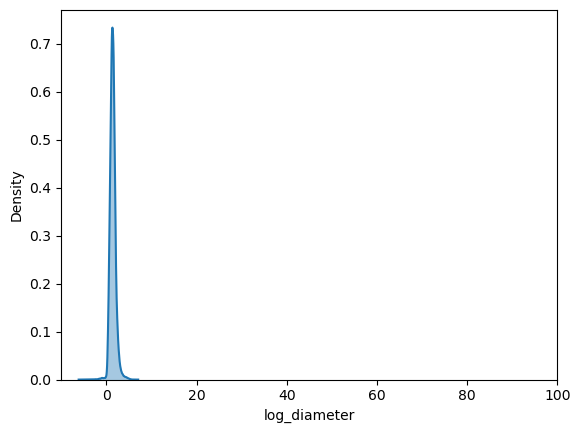

In [40]:
sns.distplot(df_new['log_diameter'])
plt.xlim(-10,100)

<Axes: ylabel='log_diameter'>

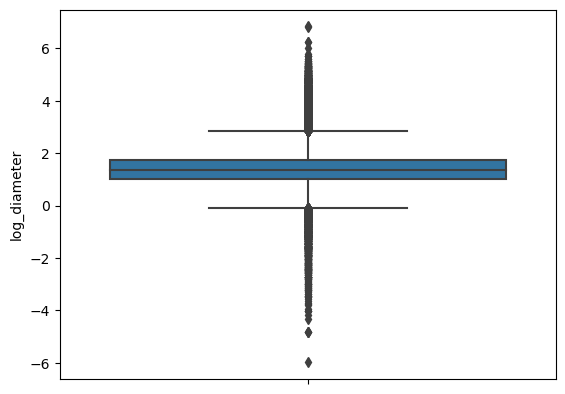

In [41]:
sns.boxplot(y=df_new['log_diameter'])

#<span style="font-size: 20px;">Even after applying Log transformation,the outliers exist.Therfore these are considered to be the actual values.If we neglect these values it means we are neglecting the actual values.Hence they can be retained.  </span>

In [42]:
df2=df_new.drop(['log_diameter'],axis=1)
df2

,full_name,neo,pha,H,diameter,albedo,epoch,e,a,q,...,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),N,N,3.33,939.400,0.0900,2459800.5,0.0786,2.767,2.549,...,2.98,0.2142,2459920.37,1680.0,1.590,2.09,MBA,9520.0,0,0.43153
1,2 Pallas (A802 FA),N,N,4.11,513.000,0.1550,2459800.5,0.2300,2.769,2.133,...,3.41,0.2139,2460010.50,1680.0,1.230,1.85,MBA,79390.0,0,0.35570
2,3 Juno (A804 RA),N,N,5.12,246.596,0.2140,2459800.5,0.2568,2.670,1.985,...,3.36,0.2259,2460036.83,1590.0,1.040,2.19,MBA,79466.0,0,0.34530
3,4 Vesta (A807 FA),N,N,3.20,525.400,0.4228,2459800.5,0.0884,2.362,2.153,...,2.57,0.2715,2459575.12,1330.0,1.140,2.47,MBA,25743.0,0,0.40095
4,5 Astraea (A845 XA),N,N,7.01,106.699,0.2740,2459800.5,0.1890,2.578,2.090,...,3.06,0.2382,2460436.30,1510.0,1.100,1.96,MBA,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),N,N,18.30,1.870,0.0730,2459800.5,0.2460,2.742,2.067,...,3.42,0.2171,2460389.46,1660.0,1.120,1.82,MBA,6557.0,1,0.52751
139704,(2019 BY5),N,N,17.10,2.182,0.0540,2459800.5,0.2966,2.718,1.912,...,3.52,0.2200,2459982.46,1640.0,0.985,2.01,MBA,3763.0,0,0.42858
139705,(2019 BX6),N,N,17.45,1.688,NaN,2459800.5,0.2423,2.681,2.031,...,3.33,0.2245,2459941.00,1600.0,1.060,2.11,MBA,7084.0,0,0.46238
139706,(2019 BB7),N,N,16.80,2.887,0.1110,2459800.5,0.1594,2.788,2.344,...,3.23,0.2117,2460429.02,1700.0,1.360,1.77,MBA,4704.0,0,0.51827


In [43]:
df2.shape

(139708, 24)

In [44]:
df2.columns

Index(['full_name', 'neo', 'pha', 'H', 'diameter', 'albedo', 'epoch', 'e', 'a',
       'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per', 'moid', 'moid_jup',
       'class', 'data_arc', 'condition_code', 'rms'],
      dtype='object')

#<span style="font-size: 20px;">Continuous Independent variables distribution </span>

array([[<Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'albedo'}>,
        <Axes: title={'center': 'epoch'}>, <Axes: title={'center': 'e'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'q'}>,
        <Axes: title={'center': 'i'}>, <Axes: title={'center': 'om'}>],
       [<Axes: title={'center': 'w'}>, <Axes: title={'center': 'ma'}>,
        <Axes: title={'center': 'ad'}>, <Axes: title={'center': 'n'}>],
       [<Axes: title={'center': 'tp'}>, <Axes: title={'center': 'per'}>,
        <Axes: title={'center': 'moid'}>,
        <Axes: title={'center': 'moid_jup'}>],
       [<Axes: title={'center': 'data_arc'}>,
        <Axes: title={'center': 'condition_code'}>,
        <Axes: title={'center': 'rms'}>, <Axes: >]], dtype=object)

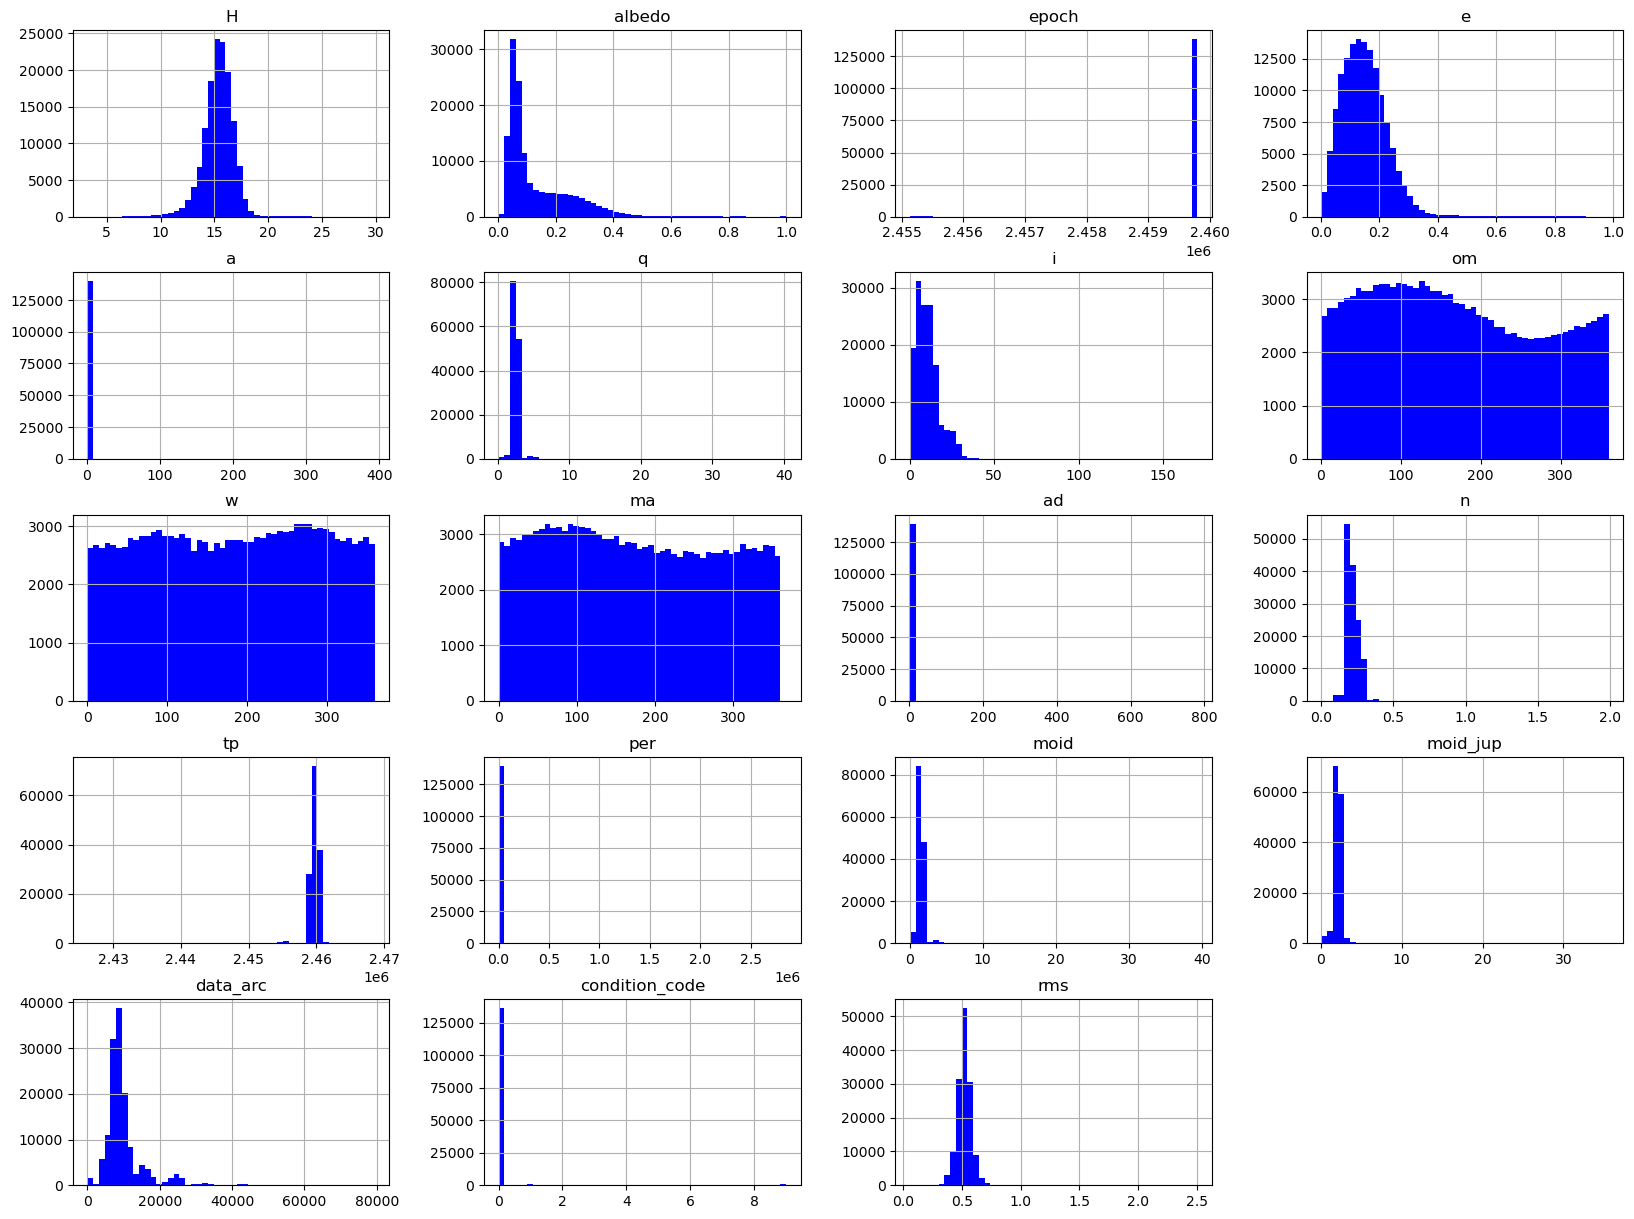

In [45]:
df_cont=df2.drop(['diameter'],axis=1)
df_cont.hist(bins=50,figsize=(20,15),color='b')

#<span style="font-size: 20px;">Each Independent variables display different distributions.
                   
      - Some features like albedo,e,data_arc display skewed distributions
      - Features like om,w,ma are somewhat a uniform distribution.
      - Also the feature values vary a lot.Therefore it should be scaled.
</span>

#<span style="font-size: 20px;">Categorical Independent variables distribution </span>

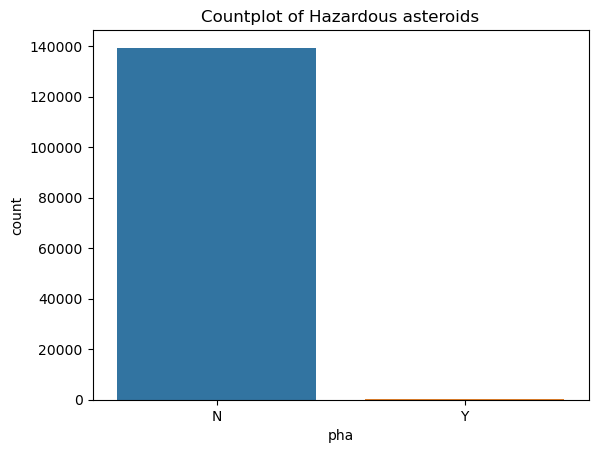

In [46]:
sns.countplot(x=df2['pha'])
plt.title('Countplot of Hazardous asteroids')
plt.show()

(0.0, 1000.0)

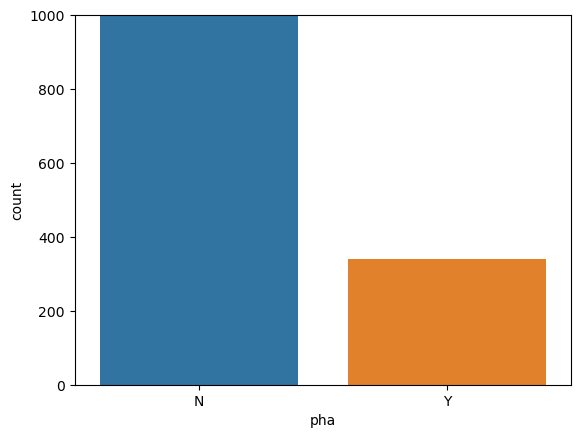

In [47]:
sns.countplot(x=df2['pha'])
plt.ylim(0,1000)

#<span style="font-size: 20px;">Observations:

   - Almost 99% of the asteroids are non-hazardous.
   - Only a minor percent of asteroids are hazardous.
</span>

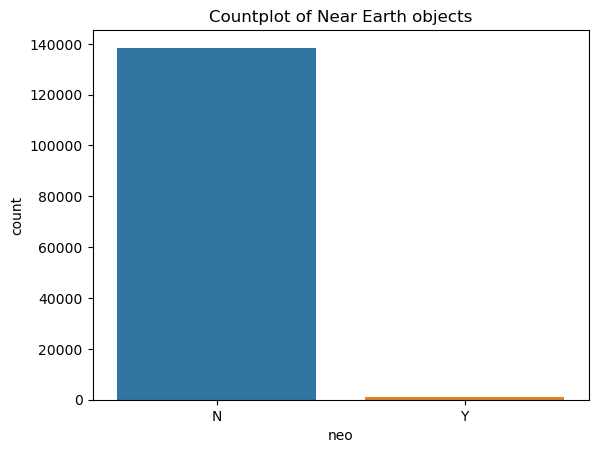

In [48]:
sns.countplot(x=df2['neo'])
plt.title('Countplot of Near Earth objects')
plt.show()

(0.0, 1000.0)

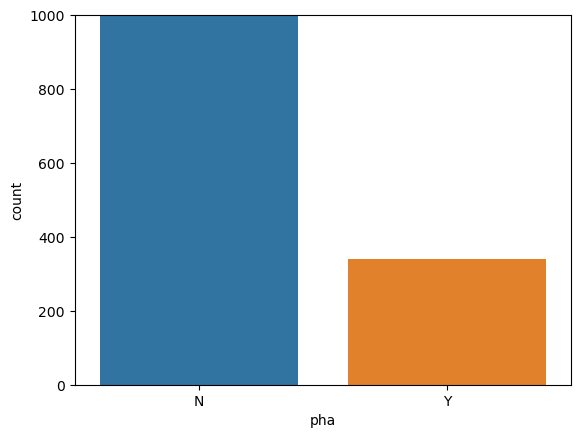

In [49]:
sns.countplot(x=df2['pha'])
plt.ylim(0,1000)

#<span style="font-size: 20px;">Observations:

   - More than 99% of the asteroids are not near earth objects.
   - Only a minor percent of asteroids are considered as near earth objects.</span>

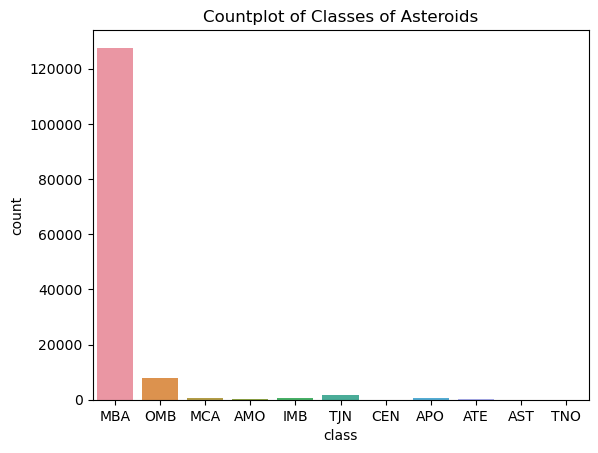

In [50]:
sns.countplot(x=df2['class'])
plt.title('Countplot of Classes of Asteroids')
plt.show()

(0.0, 5000.0)

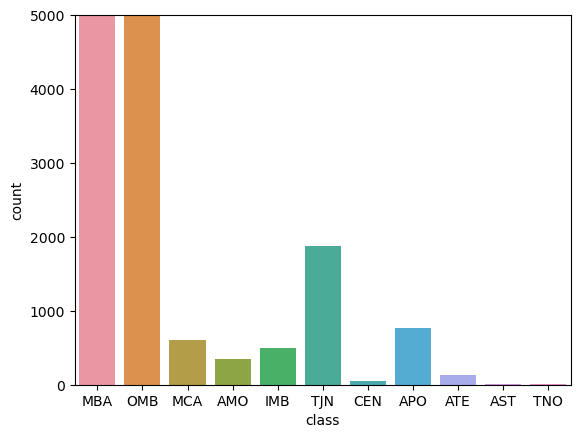

In [51]:
sns.countplot(x=df2['class'])
plt.ylim(0,5000)

#<span style="font-size: 20px;">Observations:

   - More than 90% of the asteroids belong to main-asteroid belt.
   - Near earth asteroids-Amor,Apollo,Ate constitute small percentage of total asteroids.
   - Rest of the asteroids belong to other 10 classes.</span>

#<span style="font-size: 25px;">2.Bivariate Analysis </span>

#<span style="font-size: 20px;">Continuous Independent variable vs Diameter </span>

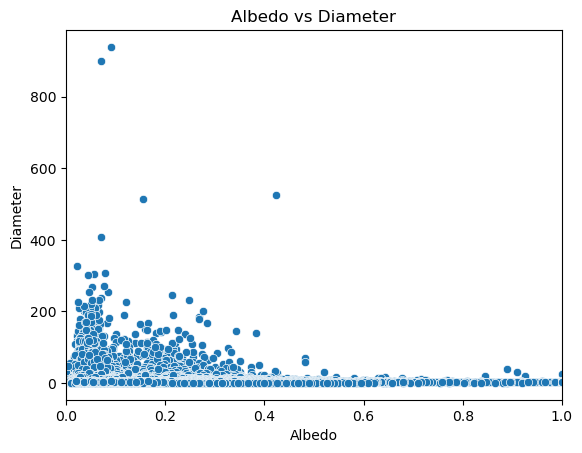

In [52]:
sns.scatterplot(x=df2['albedo'],y=df2['diameter'])
plt.title('Albedo vs Diameter')
plt.xlabel('Albedo')
plt.ylabel('Diameter')
plt.xlim(0,1)
plt.show()

#<span style="font-size: 20px;">The more number of albedo values are overlapping.Values are increasing from 0-0.4 and remains constant from 0.4-1.From 0-200 km diameter the albedo values increases and very less values are distributed after that. </span>

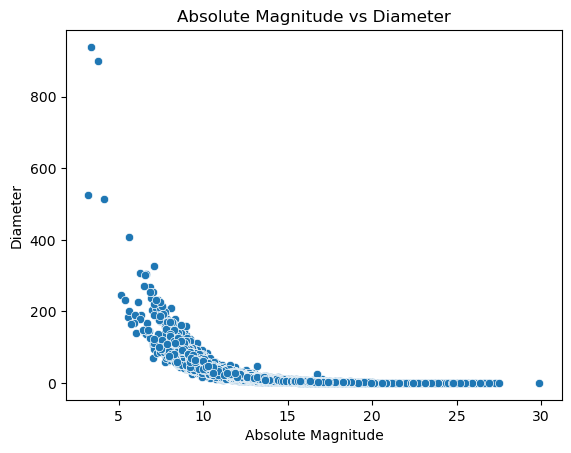

In [53]:
sns.scatterplot(x=df2['H'],y=df2['diameter'])
plt.title('Absolute Magnitude vs Diameter')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Diameter')
plt.show()

#<span style="font-size: 20px;">The more number of points are lying within the range of 5-15 and decreases after that.From 0-200 km diameter the absolute Magnitude values increases and very less values are present after that. </span>

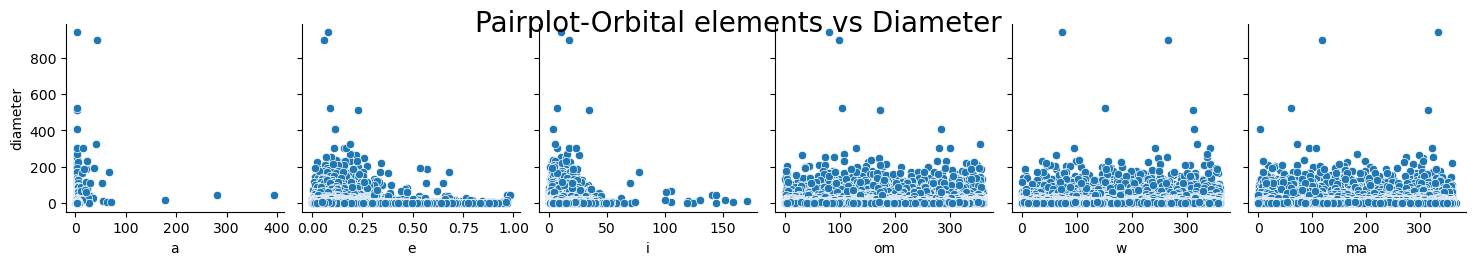

In [54]:
orb_ele=['a','e','i','om','w','ma']

sns.pairplot(df2,x_vars=orb_ele,y_vars='diameter')
plt.suptitle('Pairplot-Orbital elements vs Diameter',y=1.02,fontsize=20)
plt.show()

#<span style="font-size: 20px;">
     -The features 'a','e','i' w.r.t diameter are clustered within 0-300 km and above that only few points are present.
     -The features 'om','w','ma' w.r.t diameter are clustered within 0-200 km and above that only few points are present
</span>

#<span style="font-size: 25px;">Correlation between continuous variables and Diameter </span>

In [55]:
corr_cont=df2[['albedo','H','a','e','i','om','w','ma','epoch','q','ad', 'n', 'tp', 'per', 'moid', 'moid_jup','data_arc', 
               'condition_code', 'rms']]

corr=corr_cont.corrwith(df2['diameter'])
corr_df=pd.DataFrame()
corr_df['Correlation with diameter']=corr
corr_df

,Correlation with diameter
albedo,-0.107882
H,-0.568188
a,0.143044
e,-0.063685
i,0.051789
om,0.000893
w,0.003246
ma,0.005739
epoch,0.033842
q,0.327220


#<span style="font-size: 20px;">
      The features albedo,e,n,tp,moid_jup,condition_code, shows a negative correlation and the features a,i,om,w,ma,epoch,ad,per shows a positive correlation with diameter.
</span>

#<span style="font-size: 20px;">Categorical Independent variable vs Diameter </span>

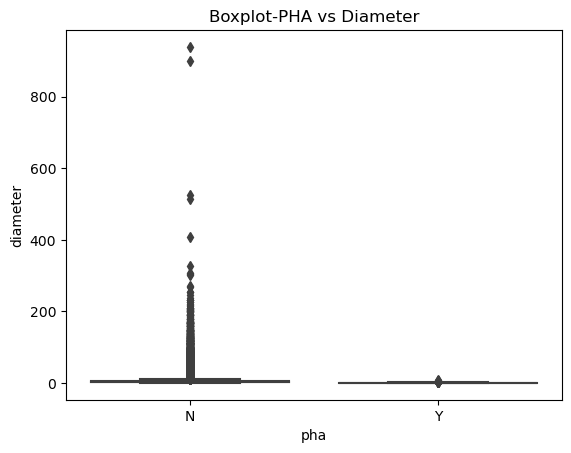

In [56]:
sns.boxplot(df2,x='pha',y='diameter')
plt.title('Boxplot-PHA vs Diameter')
plt.show()

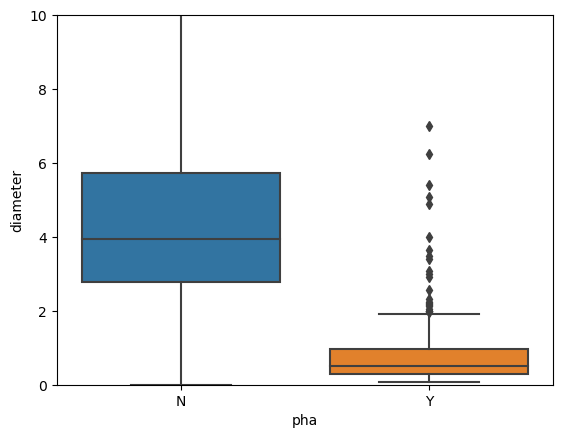

In [57]:
sns.boxplot(df2,x='pha',y='diameter')
plt.ylim(0,10)
plt.show()

#<span style="font-size: 20px;">Asteroids that are labelled as potentially hazardous are mostly less than 1 km in size as per the data. 
  For Non hazardous category also, we observe that most of them are within 1 km size, but there are also some very obvious 
bigger ones here </span>

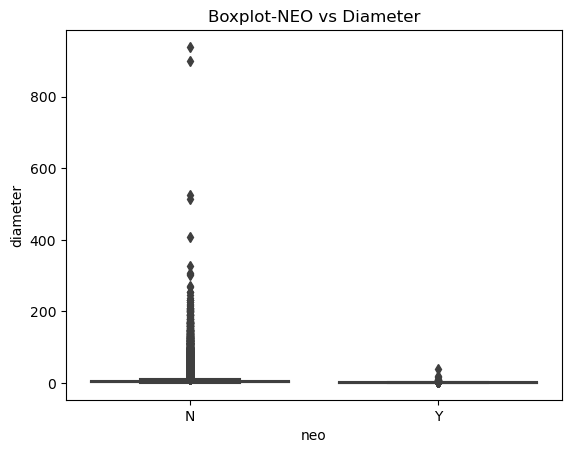

In [58]:
sns.boxplot(df2,x='neo',y='diameter')
plt.title('Boxplot-NEO vs Diameter')
plt.show()

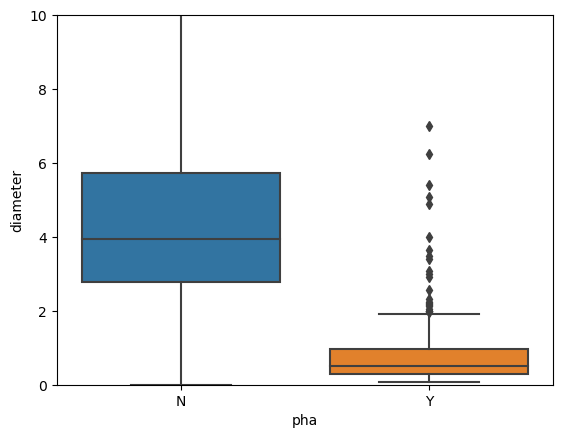

In [59]:
sns.boxplot(df2,x='pha',y='diameter')
plt.ylim(0,10)
plt.show()

#<span style="font-size: 20px;">Near Earth asteroids mostly appears to be greater than /equal to 1 km diameter.
Non NEO asteroids also are mostly approx. between 5-8 km diameter but the category also include bigger sized ones
</span>

The features pha,neo could give some direction to diameter prediction.

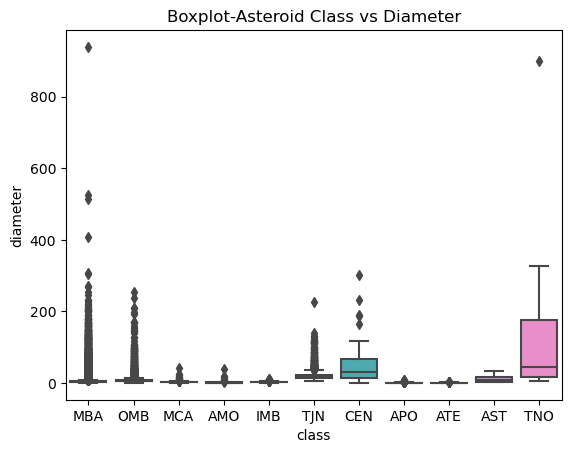

In [60]:
sns.boxplot(df2,x='class',y='diameter')
plt.title('Boxplot-Asteroid Class vs Diameter')
plt.show()

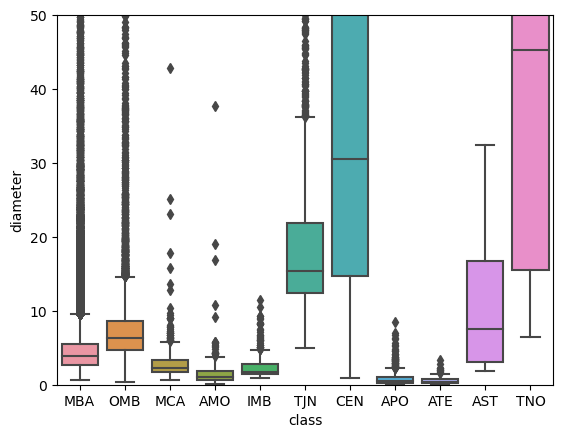

In [61]:
sns.boxplot(df2,x='class',y='diameter')
plt.ylim(0,50)
plt.show()

#<span style="font-size: 25px;">3.Multivariate Analysis </span>

#Correlation between continuous variables

In [62]:
df2.columns

Index(['full_name', 'neo', 'pha', 'H', 'diameter', 'albedo', 'epoch', 'e', 'a',
       'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'per', 'moid', 'moid_jup',
       'class', 'data_arc', 'condition_code', 'rms'],
      dtype='object')

In [63]:
corr_matrix=df2.drop(['diameter','full_name','neo','pha','class'],axis=1)
corr_matrix.corr()

,H,albedo,epoch,e,a,q,i,om,w,ma,ad,n,tp,per,moid,moid_jup,data_arc,condition_code,rms
H,1.000000,-0.227298,-0.094708,0.254664,-0.126210,-0.376910,-0.041245,0.001190,-0.009727,-0.015348,-0.064723,0.306911,-0.028872,-0.034721,-0.370381,0.193491,-0.661055,0.213368,0.548897
albedo,-0.227298,1.000000,0.048152,-0.025483,-0.115319,-0.267489,-0.083893,0.000616,-0.002917,0.034676,-0.073045,0.351115,0.051209,-0.020202,-0.272465,0.370260,0.246151,-0.057084,-0.299931
epoch,-0.094708,0.048152,1.000000,-0.013707,0.021233,0.058880,-0.105878,-0.012343,0.000486,-0.002053,0.011683,-0.076196,0.617956,0.003519,0.054503,-0.071905,0.157478,-0.942704,-0.074615
e,0.254664,-0.025483,-0.013707,1.000000,0.010770,-0.542518,0.175779,0.002742,0.011358,-0.008072,0.109415,0.217771,-0.027501,0.044118,-0.512514,-0.039145,-0.059482,0.075882,-0.068598
a,-0.126210,-0.115319,0.021233,0.010770,1.000000,0.364234,0.153398,-0.000123,-0.002224,-0.032456,0.985726,-0.271518,-0.071130,0.940896,0.368305,-0.193135,-0.031965,-0.003597,0.026555
q,-0.376910,-0.267489,0.058880,-0.542518,0.364234,1.000000,0.084364,-0.003219,-0.006192,-0.050945,0.202243,-0.686443,-0.057788,0.107790,0.996114,-0.508962,-0.033253,-0.074500,0.086007
i,-0.041245,-0.083893,-0.105878,0.175779,0.153398,0.084364,1.000000,-0.011892,-0.005410,-0.026124,0.146064,-0.116061,-0.098356,0.096042,0.126517,-0.118021,-0.181371,0.127475,-0.048259
om,0.001190,0.000616,-0.012343,0.002742,-0.000123,-0.003219,-0.011892,1.000000,-0.106298,0.000243,0.000449,0.006288,-0.010533,0.000530,-0.003914,0.015527,0.000425,0.013631,-0.064931
w,-0.009727,-0.002917,0.000486,0.011358,-0.002224,-0.006192,-0.005410,-0.106298,1.000000,0.005792,-0.001223,0.003413,0.004720,-0.001587,-0.006073,0.019312,-0.005471,-0.000497,0.031964
ma,-0.015348,0.034676,-0.002053,-0.008072,-0.032456,-0.050945,-0.026124,0.000243,0.005792,1.000000,-0.024916,0.055693,0.377398,-0.012257,-0.052539,0.067483,0.032551,-0.002834,0.039292


#<span style="font-size: 25px;">Observations:
                  
             - Strong positive correlations are observed between:
                      a and ad,q and moid,ad and per,n and moid_jup,epoch and tp,H and rms
             - Strong negative correlations are observed between:
                      epoch and condition_code,H and data_arc,tp and condition_code,n and moid,moid_jupiter and moid,
                      e and q,H and data_arc,q and n,data_arc and rms
             - No correlation is observed for w,om,ma
</span>

#<span style="font-size: 25px;">Since no correlation is observed in 'w,om,ma' ,they can be dropped.</span>

In [64]:
df2.drop(['w','om','ma'],axis=1,inplace=True)

In [65]:
df2.columns

Index(['full_name', 'neo', 'pha', 'H', 'diameter', 'albedo', 'epoch', 'e', 'a',
       'q', 'i', 'ad', 'n', 'tp', 'per', 'moid', 'moid_jup', 'class',
       'data_arc', 'condition_code', 'rms'],
      dtype='object')

In [66]:
df2.shape

(139708, 21)

In [67]:
df2

,full_name,neo,pha,H,diameter,albedo,epoch,e,a,q,...,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),N,N,3.33,939.400,0.0900,2459800.5,0.0786,2.767,2.549,...,2.98,0.2142,2459920.37,1680.0,1.590,2.09,MBA,9520.0,0,0.43153
1,2 Pallas (A802 FA),N,N,4.11,513.000,0.1550,2459800.5,0.2300,2.769,2.133,...,3.41,0.2139,2460010.50,1680.0,1.230,1.85,MBA,79390.0,0,0.35570
2,3 Juno (A804 RA),N,N,5.12,246.596,0.2140,2459800.5,0.2568,2.670,1.985,...,3.36,0.2259,2460036.83,1590.0,1.040,2.19,MBA,79466.0,0,0.34530
3,4 Vesta (A807 FA),N,N,3.20,525.400,0.4228,2459800.5,0.0884,2.362,2.153,...,2.57,0.2715,2459575.12,1330.0,1.140,2.47,MBA,25743.0,0,0.40095
4,5 Astraea (A845 XA),N,N,7.01,106.699,0.2740,2459800.5,0.1890,2.578,2.090,...,3.06,0.2382,2460436.30,1510.0,1.100,1.96,MBA,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),N,N,18.30,1.870,0.0730,2459800.5,0.2460,2.742,2.067,...,3.42,0.2171,2460389.46,1660.0,1.120,1.82,MBA,6557.0,1,0.52751
139704,(2019 BY5),N,N,17.10,2.182,0.0540,2459800.5,0.2966,2.718,1.912,...,3.52,0.2200,2459982.46,1640.0,0.985,2.01,MBA,3763.0,0,0.42858
139705,(2019 BX6),N,N,17.45,1.688,NaN,2459800.5,0.2423,2.681,2.031,...,3.33,0.2245,2459941.00,1600.0,1.060,2.11,MBA,7084.0,0,0.46238
139706,(2019 BB7),N,N,16.80,2.887,0.1110,2459800.5,0.1594,2.788,2.344,...,3.23,0.2117,2460429.02,1700.0,1.360,1.77,MBA,4704.0,0,0.51827


# Inferences from EDA

-Target Diameter has skewed distribution, we have outliers which are actual events that needs to be considered.

-Continuous independent variables are of varying scale and distribution, hence they should be scaled before modelling

-There are some missing values in certain features that has to be either replaced or removed .

-There are no duplicate records in the dataset

-The features "IR, GM, extent, G, UB, spec_T, BV, spec_B, H_sigma,rot_per" has a missing values percentage greater than '40'.
 Hence these features are dropped .And the features whose missing values percentage is 
 lesser than 40(albedo,H,diameter_sigma,data_arc) can be imputed with values based on their distribution.

-Continuous features data_arc display strong correlation with diameter as stated by pearson correlation coefficient value

-Very Strong positive correlations are observed between the variables-a and ad,q and moid,ad and per.

-Very Strong negative correlations are observed between the variables-epoch and condition_code

-Since no correlation is observed in 'w,om,ma' ,they have been dropped.

# Feature Engineering

# 1.Label Encoding of Categorical features

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [69]:
df_encode=pd.DataFrame()
df_encode['neo']=df2['neo']
df_encode['pha']=df2['pha']
df_encode['class']=df2['class']

In [70]:
features_to_encode = [col for col in df_encode ]

In [71]:
for columns in features_to_encode:
    df2[columns]=label_encoder.fit_transform(df2[columns])

In [72]:
df2

,full_name,neo,pha,H,diameter,albedo,epoch,e,a,q,...,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),0,0,3.33,939.400,0.0900,2459800.5,0.0786,2.767,2.549,...,2.98,0.2142,2459920.37,1680.0,1.590,2.09,6,9520.0,0,0.43153
1,2 Pallas (A802 FA),0,0,4.11,513.000,0.1550,2459800.5,0.2300,2.769,2.133,...,3.41,0.2139,2460010.50,1680.0,1.230,1.85,6,79390.0,0,0.35570
2,3 Juno (A804 RA),0,0,5.12,246.596,0.2140,2459800.5,0.2568,2.670,1.985,...,3.36,0.2259,2460036.83,1590.0,1.040,2.19,6,79466.0,0,0.34530
3,4 Vesta (A807 FA),0,0,3.20,525.400,0.4228,2459800.5,0.0884,2.362,2.153,...,2.57,0.2715,2459575.12,1330.0,1.140,2.47,6,25743.0,0,0.40095
4,5 Astraea (A845 XA),0,0,7.01,106.699,0.2740,2459800.5,0.1890,2.578,2.090,...,3.06,0.2382,2460436.30,1510.0,1.100,1.96,6,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),0,0,18.30,1.870,0.0730,2459800.5,0.2460,2.742,2.067,...,3.42,0.2171,2460389.46,1660.0,1.120,1.82,6,6557.0,1,0.52751
139704,(2019 BY5),0,0,17.10,2.182,0.0540,2459800.5,0.2966,2.718,1.912,...,3.52,0.2200,2459982.46,1640.0,0.985,2.01,6,3763.0,0,0.42858
139705,(2019 BX6),0,0,17.45,1.688,NaN,2459800.5,0.2423,2.681,2.031,...,3.33,0.2245,2459941.00,1600.0,1.060,2.11,6,7084.0,0,0.46238
139706,(2019 BB7),0,0,16.80,2.887,0.1110,2459800.5,0.1594,2.788,2.344,...,3.23,0.2117,2460429.02,1700.0,1.360,1.77,6,4704.0,0,0.51827


#<span style="font-size: 23px;">The three categorical features of this data-NEO,PHA,Class have been encoded</span>

# 2.Missing Values Imputation

In [73]:
df2_new=df2.copy()

In [74]:
df2_new.columns

Index(['full_name', 'neo', 'pha', 'H', 'diameter', 'albedo', 'epoch', 'e', 'a',
       'q', 'i', 'ad', 'n', 'tp', 'per', 'moid', 'moid_jup', 'class',
       'data_arc', 'condition_code', 'rms'],
      dtype='object')

In [75]:
df2_new

,full_name,neo,pha,H,diameter,albedo,epoch,e,a,q,...,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),0,0,3.33,939.400,0.0900,2459800.5,0.0786,2.767,2.549,...,2.98,0.2142,2459920.37,1680.0,1.590,2.09,6,9520.0,0,0.43153
1,2 Pallas (A802 FA),0,0,4.11,513.000,0.1550,2459800.5,0.2300,2.769,2.133,...,3.41,0.2139,2460010.50,1680.0,1.230,1.85,6,79390.0,0,0.35570
2,3 Juno (A804 RA),0,0,5.12,246.596,0.2140,2459800.5,0.2568,2.670,1.985,...,3.36,0.2259,2460036.83,1590.0,1.040,2.19,6,79466.0,0,0.34530
3,4 Vesta (A807 FA),0,0,3.20,525.400,0.4228,2459800.5,0.0884,2.362,2.153,...,2.57,0.2715,2459575.12,1330.0,1.140,2.47,6,25743.0,0,0.40095
4,5 Astraea (A845 XA),0,0,7.01,106.699,0.2740,2459800.5,0.1890,2.578,2.090,...,3.06,0.2382,2460436.30,1510.0,1.100,1.96,6,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),0,0,18.30,1.870,0.0730,2459800.5,0.2460,2.742,2.067,...,3.42,0.2171,2460389.46,1660.0,1.120,1.82,6,6557.0,1,0.52751
139704,(2019 BY5),0,0,17.10,2.182,0.0540,2459800.5,0.2966,2.718,1.912,...,3.52,0.2200,2459982.46,1640.0,0.985,2.01,6,3763.0,0,0.42858
139705,(2019 BX6),0,0,17.45,1.688,NaN,2459800.5,0.2423,2.681,2.031,...,3.33,0.2245,2459941.00,1600.0,1.060,2.11,6,7084.0,0,0.46238
139706,(2019 BB7),0,0,16.80,2.887,0.1110,2459800.5,0.1594,2.788,2.344,...,3.23,0.2117,2460429.02,1700.0,1.360,1.77,6,4704.0,0,0.51827


In [76]:
df2_new.shape

(139708, 21)

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139708 entries, 0 to 139707
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       139708 non-null  object 
 1   neo             139708 non-null  int32  
 2   pha             139708 non-null  int32  
 3   H               138594 non-null  float64
 4   diameter        139708 non-null  float64
 5   albedo          138569 non-null  float64
 6   epoch           139708 non-null  float64
 7   e               139708 non-null  float64
 8   a               139708 non-null  float64
 9   q               139708 non-null  float64
 10  i               139708 non-null  float64
 11  ad              139708 non-null  float64
 12  n               139708 non-null  float64
 13  tp              139708 non-null  float64
 14  per             139708 non-null  float64
 15  moid            139708 non-null  float64
 16  moid_jup        139708 non-null  float64
 17  class     

In [78]:
missing_values=(df2_new.isnull().mean())*100
missing_values

full_name         0.000000
neo               0.000000
pha               0.000000
H                 0.797377
diameter          0.000000
albedo            0.815272
epoch             0.000000
e                 0.000000
a                 0.000000
q                 0.000000
i                 0.000000
ad                0.000000
n                 0.000000
tp                0.000000
per               0.000000
moid              0.000000
moid_jup          0.000000
class             0.000000
data_arc          0.017894
condition_code    0.000000
rms               0.000000
dtype: float64

#<span style="font-size: 23px;">Imputing H,albedo,data_arc with values based on their distribution</span>

#<span style="font-size: 20px;">Absolute magnitude(H) </span>

<Axes: xlabel='H', ylabel='Density'>

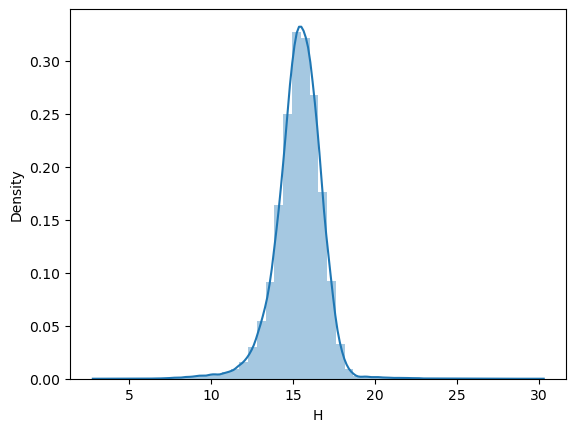

In [79]:
sns.distplot(df2['H'])

#<span style="font-size: 20px;">As it somewhat follows a normal distribution,it can be imputed with mean</span>

In [80]:
H_mean=df2['H'].mean()
H_mean

15.352341731965307

In [81]:
#imputing H with its mean
df2['H'].fillna(H_mean,inplace=True)
df2['H']

0          3.33
1          4.11
2          5.12
3          3.20
4          7.01
          ...  
139703    18.30
139704    17.10
139705    17.45
139706    16.80
139707    17.40
Name: H, Length: 139708, dtype: float64

#<span style="font-size: 20px;">Albedo </span>

<Axes: xlabel='albedo', ylabel='Density'>

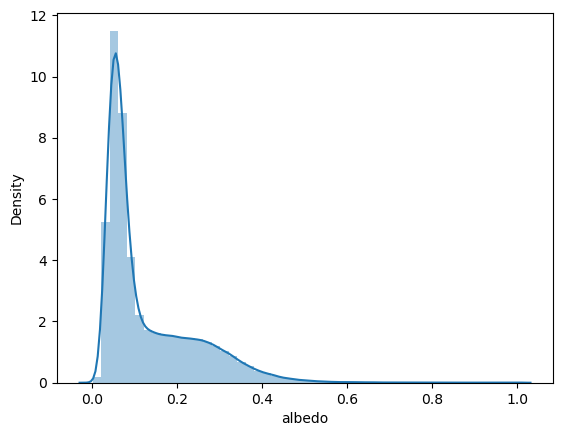

In [82]:
sns.distplot(df2['albedo'])

#<span style="font-size: 20px;">As it follows a skewed distribution,it can be imputed with median</span>

In [83]:
alb_med=df2['albedo'].median()
alb_med

0.078

In [84]:
#imputing albedo with its median
df2['albedo'].fillna(alb_med,inplace=True)
df2['albedo']

0         0.0900
1         0.1550
2         0.2140
3         0.4228
4         0.2740
           ...  
139703    0.0730
139704    0.0540
139705    0.0780
139706    0.1110
139707    0.0740
Name: albedo, Length: 139708, dtype: float64

#<span style="font-size: 20px;">Data_arc </span>

<Axes: xlabel='data_arc', ylabel='Density'>

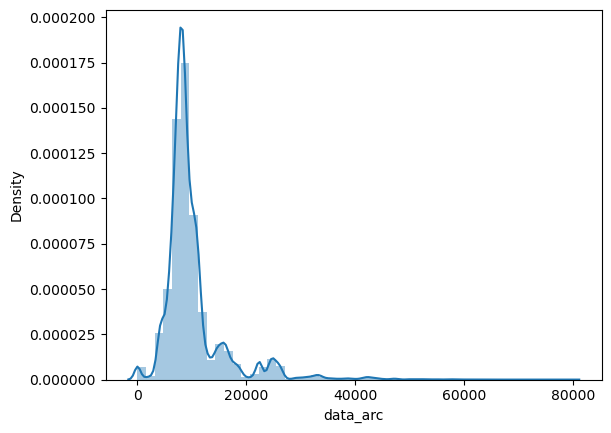

In [85]:
sns.distplot(df2['data_arc'])

In [86]:
da_med=df2['data_arc'].median()
da_med

8550.0

In [87]:
#imputing data_arc with its median
df2['data_arc'].fillna(da_med,inplace=True)
df2['data_arc']

0          9520.0
1         79390.0
2         79466.0
3         25743.0
4         64243.0
           ...   
139703     6557.0
139704     3763.0
139705     7084.0
139706     4704.0
139707     5246.0
Name: data_arc, Length: 139708, dtype: float64

In [88]:
df2.isnull().sum()

full_name         0
neo               0
pha               0
H                 0
diameter          0
albedo            0
epoch             0
e                 0
a                 0
q                 0
i                 0
ad                0
n                 0
tp                0
per               0
moid              0
moid_jup          0
class             0
data_arc          0
condition_code    0
rms               0
dtype: int64

In [89]:
df2

,full_name,neo,pha,H,diameter,albedo,epoch,e,a,q,...,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),0,0,3.33,939.400,0.0900,2459800.5,0.0786,2.767,2.549,...,2.98,0.2142,2459920.37,1680.0,1.590,2.09,6,9520.0,0,0.43153
1,2 Pallas (A802 FA),0,0,4.11,513.000,0.1550,2459800.5,0.2300,2.769,2.133,...,3.41,0.2139,2460010.50,1680.0,1.230,1.85,6,79390.0,0,0.35570
2,3 Juno (A804 RA),0,0,5.12,246.596,0.2140,2459800.5,0.2568,2.670,1.985,...,3.36,0.2259,2460036.83,1590.0,1.040,2.19,6,79466.0,0,0.34530
3,4 Vesta (A807 FA),0,0,3.20,525.400,0.4228,2459800.5,0.0884,2.362,2.153,...,2.57,0.2715,2459575.12,1330.0,1.140,2.47,6,25743.0,0,0.40095
4,5 Astraea (A845 XA),0,0,7.01,106.699,0.2740,2459800.5,0.1890,2.578,2.090,...,3.06,0.2382,2460436.30,1510.0,1.100,1.96,6,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),0,0,18.30,1.870,0.0730,2459800.5,0.2460,2.742,2.067,...,3.42,0.2171,2460389.46,1660.0,1.120,1.82,6,6557.0,1,0.52751
139704,(2019 BY5),0,0,17.10,2.182,0.0540,2459800.5,0.2966,2.718,1.912,...,3.52,0.2200,2459982.46,1640.0,0.985,2.01,6,3763.0,0,0.42858
139705,(2019 BX6),0,0,17.45,1.688,0.0780,2459800.5,0.2423,2.681,2.031,...,3.33,0.2245,2459941.00,1600.0,1.060,2.11,6,7084.0,0,0.46238
139706,(2019 BB7),0,0,16.80,2.887,0.1110,2459800.5,0.1594,2.788,2.344,...,3.23,0.2117,2460429.02,1700.0,1.360,1.77,6,4704.0,0,0.51827


# 3.Ouliers Detection

In [90]:
df2.columns

Index(['full_name', 'neo', 'pha', 'H', 'diameter', 'albedo', 'epoch', 'e', 'a',
       'q', 'i', 'ad', 'n', 'tp', 'per', 'moid', 'moid_jup', 'class',
       'data_arc', 'condition_code', 'rms'],
      dtype='object')

<Axes: >

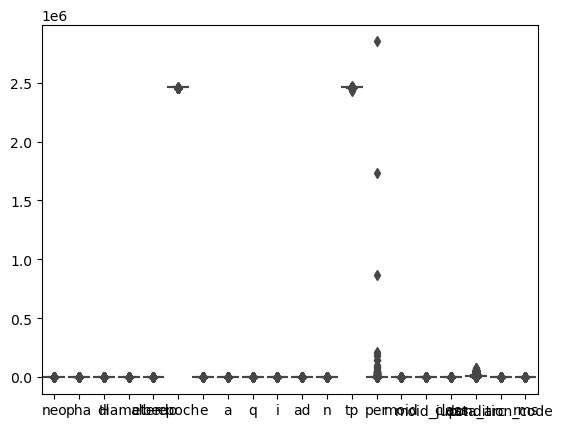

In [91]:
sns.boxplot(df2)

#<span style="font-size: 23px;">There are some outliers in certain features which are considered as actual values.Hence they can be retained.</span>

# Model Building - DIAMETER PREDICTION

#<span style="font-size: 23px;">Train-Test split</span>

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X=df2.drop(['full_name','diameter'],axis=1)
X

,neo,pha,H,albedo,epoch,e,a,q,i,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,0,0,3.33,0.0900,2459800.5,0.0786,2.767,2.549,10.59,2.98,0.2142,2459920.37,1680.0,1.590,2.09,6,9520.0,0,0.43153
1,0,0,4.11,0.1550,2459800.5,0.2300,2.769,2.133,34.93,3.41,0.2139,2460010.50,1680.0,1.230,1.85,6,79390.0,0,0.35570
2,0,0,5.12,0.2140,2459800.5,0.2568,2.670,1.985,12.99,3.36,0.2259,2460036.83,1590.0,1.040,2.19,6,79466.0,0,0.34530
3,0,0,3.20,0.4228,2459800.5,0.0884,2.362,2.153,7.14,2.57,0.2715,2459575.12,1330.0,1.140,2.47,6,25743.0,0,0.40095
4,0,0,7.01,0.2740,2459800.5,0.1890,2.578,2.090,5.37,3.06,0.2382,2460436.30,1510.0,1.100,1.96,6,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,0,0,18.30,0.0730,2459800.5,0.2460,2.742,2.067,13.47,3.42,0.2171,2460389.46,1660.0,1.120,1.82,6,6557.0,1,0.52751
139704,0,0,17.10,0.0540,2459800.5,0.2966,2.718,1.912,16.56,3.52,0.2200,2459982.46,1640.0,0.985,2.01,6,3763.0,0,0.42858
139705,0,0,17.45,0.0780,2459800.5,0.2423,2.681,2.031,16.72,3.33,0.2245,2459941.00,1600.0,1.060,2.11,6,7084.0,0,0.46238
139706,0,0,16.80,0.1110,2459800.5,0.1594,2.788,2.344,8.65,3.23,0.2117,2460429.02,1700.0,1.360,1.77,6,4704.0,0,0.51827


In [94]:
Y=df2['diameter']

In [95]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,random_state=42)

In [96]:
xtrain

,neo,pha,H,albedo,epoch,e,a,q,i,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
99082,0,0,16.470000,0.030,2459800.5,0.0582,2.720,2.562,4.73,2.88,0.2197,2459952.94,1640.0,1.570,2.09,6,6669.0,0,0.57042
74401,0,0,14.520000,0.054,2459800.5,0.0370,3.133,3.017,21.54,3.25,0.1777,2459952.63,2030.0,2.050,2.00,6,9362.0,0,0.54455
41510,0,0,14.940000,0.181,2459800.5,0.0585,2.942,2.770,10.25,3.11,0.1953,2459390.16,1840.0,1.790,2.14,6,11524.0,0,0.48514
126483,0,0,15.610000,0.050,2459800.5,0.1497,3.162,2.689,27.07,3.64,0.1753,2459277.14,2050.0,1.680,1.62,6,4209.0,0,0.49501
37331,0,0,15.340000,0.049,2459800.5,0.2210,2.254,1.756,4.20,2.75,0.2912,2459559.25,1240.0,0.748,2.60,6,8315.0,0,0.46910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,0,15.310000,0.073,2459800.5,0.0476,3.210,3.057,14.77,3.36,0.1713,2459567.25,2100.0,2.050,1.84,8,6684.0,0,0.55992
119879,0,0,16.120000,0.034,2459800.5,0.0881,3.098,2.825,17.74,3.37,0.1807,2459156.32,1990.0,1.880,2.00,6,6772.0,0,0.56430
103694,0,0,14.950000,0.075,2459800.5,0.2133,3.143,2.472,13.81,3.81,0.1769,2459913.68,2030.0,1.490,1.63,6,7592.0,0,0.57916
131932,0,0,15.352342,0.094,2455236.5,0.1935,2.239,1.806,12.38,2.67,0.2941,2455059.02,1220.0,0.850,2.90,6,1.0,9,0.53241


#<span style="font-size: 23px;">Feature selection based on their importance</span>

In [97]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(xtrain,ytrain)
mutual_info

array([0.03350112, 0.01049905, 0.76658784, 1.29747939, 0.00562623,
       0.04687938, 0.22395198, 0.24763055, 0.02718058, 0.16009334,
       0.22406788, 0.05919216, 0.22550537, 0.24901479, 0.14516452,
       0.09725385, 0.18658602, 0.02801639, 0.11167559])

In [98]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=xtrain.columns
mutual_info.sort_values(ascending=False)

albedo            1.297479
H                 0.766588
moid              0.249015
q                 0.247631
per               0.225505
n                 0.224068
a                 0.223952
data_arc          0.186586
ad                0.160093
moid_jup          0.145165
rms               0.111676
class             0.097254
tp                0.059192
e                 0.046879
neo               0.033501
condition_code    0.028016
i                 0.027181
pha               0.010499
epoch             0.005626
dtype: float64

#<span style="font-size: 23px;">On considering the importance of features from above, we can see that many features contribute more to the diameter prediction except 'epoch' and 'pha' which contribute less,hence they can be dropped while model building.</span>

In [99]:
X1=df2.drop(['full_name','diameter','epoch','pha'],axis=1)
X1

,neo,H,albedo,e,a,q,i,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,0,3.33,0.0900,0.0786,2.767,2.549,10.59,2.98,0.2142,2459920.37,1680.0,1.590,2.09,6,9520.0,0,0.43153
1,0,4.11,0.1550,0.2300,2.769,2.133,34.93,3.41,0.2139,2460010.50,1680.0,1.230,1.85,6,79390.0,0,0.35570
2,0,5.12,0.2140,0.2568,2.670,1.985,12.99,3.36,0.2259,2460036.83,1590.0,1.040,2.19,6,79466.0,0,0.34530
3,0,3.20,0.4228,0.0884,2.362,2.153,7.14,2.57,0.2715,2459575.12,1330.0,1.140,2.47,6,25743.0,0,0.40095
4,0,7.01,0.2740,0.1890,2.578,2.090,5.37,3.06,0.2382,2460436.30,1510.0,1.100,1.96,6,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,0,18.30,0.0730,0.2460,2.742,2.067,13.47,3.42,0.2171,2460389.46,1660.0,1.120,1.82,6,6557.0,1,0.52751
139704,0,17.10,0.0540,0.2966,2.718,1.912,16.56,3.52,0.2200,2459982.46,1640.0,0.985,2.01,6,3763.0,0,0.42858
139705,0,17.45,0.0780,0.2423,2.681,2.031,16.72,3.33,0.2245,2459941.00,1600.0,1.060,2.11,6,7084.0,0,0.46238
139706,0,16.80,0.1110,0.1594,2.788,2.344,8.65,3.23,0.2117,2460429.02,1700.0,1.360,1.77,6,4704.0,0,0.51827


In [100]:
Y1=df2['diameter']

In [101]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X1,Y1,test_size=0.30,random_state=42)

# 1.Linear Regression

#<span style="font-size: 23px;">Linearity</span>

In [102]:
#Linearity
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [103]:
from scipy.stats import pearsonr

#<span style="font-size: 20px;">
    Hypothesis Test
    
    h0--->no signifcant correlation exists
    ha--->significant correlation exists 
</span>

In [104]:
for i in X1.columns:
    print(pearsonr(df2['diameter'],X1[i])) 

PearsonRResult(statistic=-0.045145433124564295, pvalue=6.031593099918206e-64)
PearsonRResult(statistic=-0.5678864709255542, pvalue=0.0)
PearsonRResult(statistic=-0.10673103456365456, pvalue=0.0)
PearsonRResult(statistic=-0.06368499352571108, pvalue=1.7183894172146266e-125)
PearsonRResult(statistic=0.14304388091200923, pvalue=0.0)
PearsonRResult(statistic=0.32721961762558727, pvalue=0.0)
PearsonRResult(statistic=0.05178893723282617, pvalue=1.3758125281438572e-83)
PearsonRResult(statistic=0.0912761829538919, pvalue=3.663112666942837e-256)
PearsonRResult(statistic=-0.187836676926748, pvalue=0.0)
PearsonRResult(statistic=-0.02619489528607669, pvalue=1.2114206688155291e-22)
PearsonRResult(statistic=0.04855762383416559, pvalue=1.0665153712421942e-73)
PearsonRResult(statistic=0.33046729941870684, pvalue=0.0)
PearsonRResult(statistic=-0.11039730094608301, pvalue=0.0)
PearsonRResult(statistic=0.16704489154556104, pvalue=0.0)
PearsonRResult(statistic=0.49533339223748796, pvalue=0.0)
PearsonRResu

#<span style="font-size: 23px;">From the PearsonR results all the features reject null hypothesis(pvalue<0.05) thus accepting alternate hypothesis,which says significant correlation exists between predictor and response variable.  </span>

#<span style="font-size: 23px;">Normality</span>

<Axes: xlabel='diameter', ylabel='Density'>

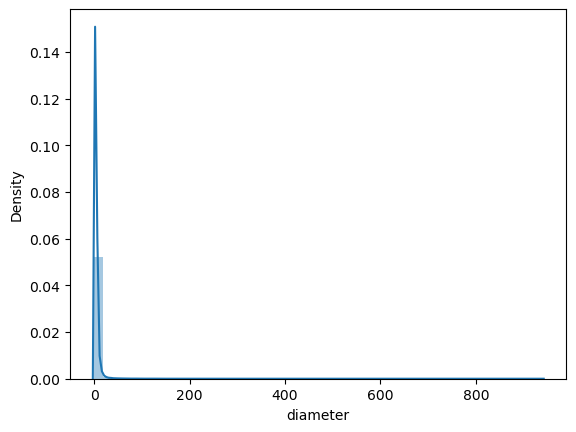

In [105]:
#Normality
import seaborn as sns
sns.distplot(df2['diameter'])

In [106]:
from scipy.stats import anderson
result=anderson(df2['diameter'])
result

AndersonResult(statistic=25851.568652075424, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=5.457189398602799, scale=9.305527830483415)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [107]:
for i in result.critical_values:
    if result.statistic < i:
        print('accept')
    else:
        print('reject')

reject
reject
reject
reject
reject


#<span style="font-size: 23px;">Box-Cox Transformation for Normality of data</span>

In [108]:
from scipy.stats import boxcox
values,lamda=boxcox(df2['diameter'])
values

array([5.1311571 , 4.79247731, 4.35730456, ..., 0.51157629, 1.011901  ,
       0.77247272])

In [109]:
lamda

-0.08868374123104909

In [110]:
df2['trans_values'] = values
df2

,full_name,neo,pha,H,diameter,albedo,epoch,e,a,q,...,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms,trans_values
0,1 Ceres (A801 AA),0,0,3.33,939.400,0.0900,2459800.5,0.0786,2.767,2.549,...,0.2142,2459920.37,1680.0,1.590,2.09,6,9520.0,0,0.43153,5.131157
1,2 Pallas (A802 FA),0,0,4.11,513.000,0.1550,2459800.5,0.2300,2.769,2.133,...,0.2139,2460010.50,1680.0,1.230,1.85,6,79390.0,0,0.35570,4.792477
2,3 Juno (A804 RA),0,0,5.12,246.596,0.2140,2459800.5,0.2568,2.670,1.985,...,0.2259,2460036.83,1590.0,1.040,2.19,6,79466.0,0,0.34530,4.357305
3,4 Vesta (A807 FA),0,0,3.20,525.400,0.4228,2459800.5,0.0884,2.362,2.153,...,0.2715,2459575.12,1330.0,1.140,2.47,6,25743.0,0,0.40095,4.806196
4,5 Astraea (A845 XA),0,0,7.01,106.699,0.2740,2459800.5,0.1890,2.578,2.090,...,0.2382,2460436.30,1510.0,1.100,1.96,6,64243.0,0,0.52133,3.823710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),0,0,18.30,1.870,0.0730,2459800.5,0.2460,2.742,2.067,...,0.2171,2460389.46,1660.0,1.120,1.82,6,6557.0,1,0.52751,0.608882
139704,(2019 BY5),0,0,17.10,2.182,0.0540,2459800.5,0.2966,2.718,1.912,...,0.2200,2459982.46,1640.0,0.985,2.01,6,3763.0,0,0.42858,0.753860
139705,(2019 BX6),0,0,17.45,1.688,0.0780,2459800.5,0.2423,2.681,2.031,...,0.2245,2459941.00,1600.0,1.060,2.11,6,7084.0,0,0.46238,0.511576
139706,(2019 BB7),0,0,16.80,2.887,0.1110,2459800.5,0.1594,2.788,2.344,...,0.2117,2460429.02,1700.0,1.360,1.77,6,4704.0,0,0.51827,1.011901


In [111]:
#now testing the transformed values for normality
result_1=anderson(df2['trans_values'])
result_1

AndersonResult(statistic=839.0758241751464, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.312926874950753, scale=0.5702470599748845)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [112]:
print(result_1.critical_values,result_1.statistic,sep='\n')

[0.576 0.656 0.787 0.918 1.092]
839.0758241751464


In [113]:
for i in result_1.critical_values:
    if result_1.statistic < i:
        print("accept")
    else:
        print("reject")

reject
reject
reject
reject
reject


In [114]:
df2.drop('trans_values',axis=1,inplace=True)
df2

,full_name,neo,pha,H,diameter,albedo,epoch,e,a,q,...,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),0,0,3.33,939.400,0.0900,2459800.5,0.0786,2.767,2.549,...,2.98,0.2142,2459920.37,1680.0,1.590,2.09,6,9520.0,0,0.43153
1,2 Pallas (A802 FA),0,0,4.11,513.000,0.1550,2459800.5,0.2300,2.769,2.133,...,3.41,0.2139,2460010.50,1680.0,1.230,1.85,6,79390.0,0,0.35570
2,3 Juno (A804 RA),0,0,5.12,246.596,0.2140,2459800.5,0.2568,2.670,1.985,...,3.36,0.2259,2460036.83,1590.0,1.040,2.19,6,79466.0,0,0.34530
3,4 Vesta (A807 FA),0,0,3.20,525.400,0.4228,2459800.5,0.0884,2.362,2.153,...,2.57,0.2715,2459575.12,1330.0,1.140,2.47,6,25743.0,0,0.40095
4,5 Astraea (A845 XA),0,0,7.01,106.699,0.2740,2459800.5,0.1890,2.578,2.090,...,3.06,0.2382,2460436.30,1510.0,1.100,1.96,6,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),0,0,18.30,1.870,0.0730,2459800.5,0.2460,2.742,2.067,...,3.42,0.2171,2460389.46,1660.0,1.120,1.82,6,6557.0,1,0.52751
139704,(2019 BY5),0,0,17.10,2.182,0.0540,2459800.5,0.2966,2.718,1.912,...,3.52,0.2200,2459982.46,1640.0,0.985,2.01,6,3763.0,0,0.42858
139705,(2019 BX6),0,0,17.45,1.688,0.0780,2459800.5,0.2423,2.681,2.031,...,3.33,0.2245,2459941.00,1600.0,1.060,2.11,6,7084.0,0,0.46238
139706,(2019 BB7),0,0,16.80,2.887,0.1110,2459800.5,0.1594,2.788,2.344,...,3.23,0.2117,2460429.02,1700.0,1.360,1.77,6,4704.0,0,0.51827


#<span style="font-size: 23px;">Even after applying transformation the data is not normally distributed,
this means that diameter doesnt follow normal distribution.</span>

#<span style="font-size: 23px;">No Multicollinearity</span>

In [115]:
X1

,neo,H,albedo,e,a,q,i,ad,n,tp,per,moid,moid_jup,class,data_arc,condition_code,rms
0,0,3.33,0.0900,0.0786,2.767,2.549,10.59,2.98,0.2142,2459920.37,1680.0,1.590,2.09,6,9520.0,0,0.43153
1,0,4.11,0.1550,0.2300,2.769,2.133,34.93,3.41,0.2139,2460010.50,1680.0,1.230,1.85,6,79390.0,0,0.35570
2,0,5.12,0.2140,0.2568,2.670,1.985,12.99,3.36,0.2259,2460036.83,1590.0,1.040,2.19,6,79466.0,0,0.34530
3,0,3.20,0.4228,0.0884,2.362,2.153,7.14,2.57,0.2715,2459575.12,1330.0,1.140,2.47,6,25743.0,0,0.40095
4,0,7.01,0.2740,0.1890,2.578,2.090,5.37,3.06,0.2382,2460436.30,1510.0,1.100,1.96,6,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,0,18.30,0.0730,0.2460,2.742,2.067,13.47,3.42,0.2171,2460389.46,1660.0,1.120,1.82,6,6557.0,1,0.52751
139704,0,17.10,0.0540,0.2966,2.718,1.912,16.56,3.52,0.2200,2459982.46,1640.0,0.985,2.01,6,3763.0,0,0.42858
139705,0,17.45,0.0780,0.2423,2.681,2.031,16.72,3.33,0.2245,2459941.00,1600.0,1.060,2.11,6,7084.0,0,0.46238
139706,0,16.80,0.1110,0.1594,2.788,2.344,8.65,3.23,0.2117,2460429.02,1700.0,1.360,1.77,6,4704.0,0,0.51827


In [116]:
Y1

0         939.400
1         513.000
2         246.596
3         525.400
4         106.699
           ...   
139703      1.870
139704      2.182
139705      1.688
139706      2.887
139707      2.226
Name: diameter, Length: 139708, dtype: float64

In [117]:
#Multi collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
data1=[variance_inflation_factor(X1.values,i) for i in range(len(X1.columns))]
data1

[3.6095415601364373,
 442.45751955563657,
 3.453867298815749,
 16.3636721416932,
 4692400.792176318,
 694993.3151228505,
 4.963595036346614,
 2155289.3825821597,
 68.28807600292141,
 2016.3655390218385,
 34.450918039738056,
 2155.8362343094814,
 57.69214543137267,
 191.8204258624574,
 9.519756433121602,
 1.1074207908927312,
 120.8887840821972]

In [118]:
import pandas as pd
data2=pd.DataFrame()
data2['Features'] = X1.columns
data2['VIF'] = data1
data2

,Features,VIF
0,neo,3.609542e+00
1,H,4.424575e+02
2,albedo,3.453867e+00
3,e,1.636367e+01
4,a,4.692401e+06
5,q,6.949933e+05
6,i,4.963595e+00
7,ad,2.155289e+06
8,n,6.828808e+01
9,tp,2.016366e+03


#<span style="font-size: 23px;">Doing PCA to find the variances of independent variables with diameter</span>

In [119]:
from sklearn.decomposition import PCA
pca_model=PCA()
pca_model.fit(X1)

PCA()

In [120]:
var_ratio=pca_model.explained_variance_ratio_
var_ratio

array([7.07558911e-01, 2.88896386e-01, 3.54430526e-03, 3.67643972e-07,
       1.43872651e-08, 5.34629051e-09, 3.85283068e-09, 3.26301316e-09,
       1.73186252e-09, 1.14415990e-09, 7.17137378e-11, 4.63019362e-11,
       1.80107525e-11, 1.51232834e-11, 6.10189309e-12, 4.02365862e-12,
       1.19295587e-14])

In [121]:
var_df=pd.DataFrame()
var_df['Features']=X1.columns
var_df['Variances']=var_ratio
var_df

,Features,Variances
0,neo,7.075589e-01
1,H,2.888964e-01
2,albedo,3.544305e-03
3,e,3.676440e-07
4,a,1.438727e-08
5,q,5.346291e-09
6,i,3.852831e-09
7,ad,3.263013e-09
8,n,1.731863e-09
9,tp,1.144160e-09


In [122]:
var_df.sort_values(by='Variances',ascending=False)
var_df

,Features,Variances
0,neo,7.075589e-01
1,H,2.888964e-01
2,albedo,3.544305e-03
3,e,3.676440e-07
4,a,1.438727e-08
5,q,5.346291e-09
6,i,3.852831e-09
7,ad,3.263013e-09
8,n,1.731863e-09
9,tp,1.144160e-09


#<span style="font-size: 23px;">From the above considering only the features that has high variances and dropping those that has less variance</span>

In [123]:
lin_df=X1.drop(['condition_code','rms'],axis=1)
lin_df

,neo,H,albedo,e,a,q,i,ad,n,tp,per,moid,moid_jup,class,data_arc
0,0,3.33,0.0900,0.0786,2.767,2.549,10.59,2.98,0.2142,2459920.37,1680.0,1.590,2.09,6,9520.0
1,0,4.11,0.1550,0.2300,2.769,2.133,34.93,3.41,0.2139,2460010.50,1680.0,1.230,1.85,6,79390.0
2,0,5.12,0.2140,0.2568,2.670,1.985,12.99,3.36,0.2259,2460036.83,1590.0,1.040,2.19,6,79466.0
3,0,3.20,0.4228,0.0884,2.362,2.153,7.14,2.57,0.2715,2459575.12,1330.0,1.140,2.47,6,25743.0
4,0,7.01,0.2740,0.1890,2.578,2.090,5.37,3.06,0.2382,2460436.30,1510.0,1.100,1.96,6,64243.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,0,18.30,0.0730,0.2460,2.742,2.067,13.47,3.42,0.2171,2460389.46,1660.0,1.120,1.82,6,6557.0
139704,0,17.10,0.0540,0.2966,2.718,1.912,16.56,3.52,0.2200,2459982.46,1640.0,0.985,2.01,6,3763.0
139705,0,17.45,0.0780,0.2423,2.681,2.031,16.72,3.33,0.2245,2459941.00,1600.0,1.060,2.11,6,7084.0
139706,0,16.80,0.1110,0.1594,2.788,2.344,8.65,3.23,0.2117,2460429.02,1700.0,1.360,1.77,6,4704.0


#<span style="font-size: 23px;">Homoscedasticity</span>

In [124]:
#Homo scedasticity
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
lin_df_new=sm.add_constant(lin_df)  #adding intercept to independent variables
model=sm.OLS(Y1,lin_df_new).fit()
residues=model.resid
residues

0         902.264328
1         444.752703
2         181.948682
3         487.473821
4          57.858724
             ...    
139703      5.702040
139704      2.566270
139705      1.741218
139706      5.118787
139707      3.962312
Length: 139708, dtype: float64

In [125]:
results=het_breuschpagan(residues,lin_df_new)
results

(2735.01130475823, 0.0, 185.9535483716669, 0.0)

#<span style="font-size: 23px;">The features are heteroscedastic.</span>

#<span style="font-size: 23px;">No Autocorrelation</span>

In [126]:
#No auto correlation
from statsmodels.stats.stattools import durbin_watson  #ranges between 0-4
model1=sm.OLS(Y1,lin_df_new).fit()
res_pred=model1.predict(lin_df_new)
residuals=Y1-res_pred
dw_test_statistic = durbin_watson(residuals)
dw_test_statistic

1.062058145838511

In [127]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(lin_df, Y1, test_size=0.2, random_state=42)

X_train=scaled.fit_transform(X_train)
X_test=scaled.fit_transform(X_test)

lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [129]:
lin_pred=lin_model.predict(X_test)
MAE_LR=mean_absolute_error(Y_test,lin_pred)
R2_LR=r2_score(Y_test,lin_pred)
print("Mean Absolute error of Linear Regression model - ",MAE_LR)
print("Accuracy of Linear Regression model - ",R2_LR)

Mean Absolute error of Linear Regression model -  3.1200084668099874
Accuracy of Linear Regression model -  0.3267225230971964


# Random Forest Regressor

In [130]:
scaled_1 = StandardScaler()
Xtrain=scaled_1.fit_transform(Xtrain)
Xtest=scaled_1.fit_transform(Xtest)

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(Xtrain, Ytrain)

RandomForestRegressor(n_estimators=10, random_state=42)

In [134]:
rf_pred = rf_regressor.predict(Xtest)
MAE_RF = mean_absolute_error(Ytest, rf_pred)
R2_RF = r2_score(Ytest, rf_pred)
print("Mean Absolute error of Random Forest Regressor - ",MAE_RF)
print("Accuracy of Random Forest Regressor - ",R2_RF)

Mean Absolute error of Random Forest Regressor -  0.44667584520315895
Accuracy of Random Forest Regressor -  0.9479049050251953


# Gradient Boosting Regressor

In [135]:
from sklearn.ensemble import GradientBoostingRegressor
grad_model=GradientBoostingRegressor(random_state=42)
grad_model.fit(Xtrain,Ytrain)

GradientBoostingRegressor(random_state=42)

In [136]:
grad_pred=grad_model.predict(Xtest)
MAE_GB=mean_absolute_error(Ytest, grad_pred)
R2_GB=r2_score(Ytest, grad_pred)
print("Mean Absolute error of XGB Regressor - ",MAE_GB)
print("Accuracy of XGB Regressor - ",R2_GB)

Mean Absolute error of XGB Regressor -  0.47945536576381215
Accuracy of XGB Regressor -  0.9552684319254673


# DT Regressor

In [137]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(Xtrain,Ytrain)

DecisionTreeRegressor()

In [138]:
dt_pred=dt_model.predict(Xtest)
MAE_DT=mean_absolute_error(Ytest, dt_pred)
R2_DT=r2_score(Ytest, dt_pred)
print("Mean Absolute error of Decision Tree Regressor - ",MAE_DT)
print("Accuracy of Decision Tree Regressor - ",R2_DT)

Mean Absolute error of Decision Tree Regressor -  0.6092891107770859
Accuracy of Decision Tree Regressor -  0.9397735142803798


# Comparison of Models based on their Mean Absolute Error(MAE) and Accuracy(R2_score) 

In [139]:
model_names=['Linear Regression','Random Forest Regressor','Gradient Boost Regressor','Decision Tree Regressor']
Model_comparison=pd.DataFrame()
Model_comparison['Model_names']=model_names
Model_comparison['MAE']=MAE_LR,MAE_RF,MAE_GB,MAE_DT
Model_comparison['Accuracy']=R2_LR,R2_RF,R2_GB,R2_DT
Model_comparison

,Model_names,MAE,Accuracy
0,Linear Regression,3.120008,0.326723
1,Random Forest Regressor,0.446676,0.947905
2,Gradient Boost Regressor,0.479455,0.955268
3,Decision Tree Regressor,0.609289,0.939774


#<span style="font-size: 23px;">On comparing the model's accuracies and MAE, we can conclude that 'Gradient Boost Regressor' has high accuracy and'Random Forest' has less error compared to other regression models</span>

# PHA CLASSIFICATION

#<span style="font-size: 23px;">Here the aim is to classify whether the asteroids are Potentially Hazardous or not.The target variable is PHA </span>

In [140]:
df1

,full_name,neo,pha,H,diameter,albedo,diameter_sigma,epoch,e,a,...,n,tp,per,per_y,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),N,N,3.33,939.400,0.0900,0.20,2459800.5,0.0786,2.767,...,0.2142,2459920.37,1680.0,4.60,1.590,2.09,MBA,9520.0,0,0.43153
1,2 Pallas (A802 FA),N,N,4.11,513.000,0.1550,6.00,2459800.5,0.2300,2.769,...,0.2139,2460010.50,1680.0,4.61,1.230,1.85,MBA,79390.0,0,0.35570
2,3 Juno (A804 RA),N,N,5.12,246.596,0.2140,10.59,2459800.5,0.2568,2.670,...,0.2259,2460036.83,1590.0,4.36,1.040,2.19,MBA,79466.0,0,0.34530
3,4 Vesta (A807 FA),N,N,3.20,525.400,0.4228,0.20,2459800.5,0.0884,2.362,...,0.2715,2459575.12,1330.0,3.63,1.140,2.47,MBA,25743.0,0,0.40095
4,5 Astraea (A845 XA),N,N,7.01,106.699,0.2740,3.14,2459800.5,0.1890,2.578,...,0.2382,2460436.30,1510.0,4.14,1.100,1.96,MBA,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),N,N,18.30,1.870,0.0730,0.20,2459800.5,0.2460,2.742,...,0.2171,2460389.46,1660.0,4.54,1.120,1.82,MBA,6557.0,1,0.52751
139704,(2019 BY5),N,N,17.10,2.182,0.0540,0.28,2459800.5,0.2966,2.718,...,0.2200,2459982.46,1640.0,4.48,0.985,2.01,MBA,3763.0,0,0.42858
139705,(2019 BX6),N,N,17.45,1.688,NaN,0.48,2459800.5,0.2423,2.681,...,0.2245,2459941.00,1600.0,4.39,1.060,2.11,MBA,7084.0,0,0.46238
139706,(2019 BB7),N,N,16.80,2.887,0.1110,0.85,2459800.5,0.1594,2.788,...,0.2117,2460429.02,1700.0,4.66,1.360,1.77,MBA,4704.0,0,0.51827


In [141]:
df1.describe()

,H,diameter,albedo,diameter_sigma,epoch,e,a,q,i,om,...,ad,n,tp,per,per_y,moid,moid_jup,data_arc,condition_code,rms
count,138594.000000,139708.000000,138569.000000,139583.000000,1.397080e+05,139708.000000,139708.000000,139708.000000,139708.000000,139708.000000,...,139708.000000,139708.000000,1.397080e+05,1.397080e+05,139708.000000,139708.000000,139708.000000,139683.000000,139708.000000,139708.000000
mean,15.352342,5.457189,0.130070,0.485824,2.459762e+06,0.149425,2.823148,2.399964,10.353808,169.932907,...,3.246343,0.218882,2.459732e+06,1.791538e+03,4.905024,1.419095,2.049259,10156.767867,0.103122,0.519493
std,1.419058,9.305528,0.110338,0.795402,4.105873e+02,0.081682,1.518900,0.522269,6.863869,102.723169,...,2.888508,0.060228,6.642237e+02,9.304166e+03,25.478303,0.516136,0.478788,5945.925622,0.877247,0.061549
min,3.200000,0.002500,0.001000,0.000000,2.455130e+06,0.000600,0.626200,0.081000,0.020000,0.010000,...,1.000000,0.000126,2.426218e+06,1.810000e+02,0.496000,0.000109,0.000416,1.000000,0.000000,0.055102
25%,14.620000,2.762000,0.053000,0.180000,2.459800e+06,0.091800,2.548000,2.069000,5.110000,82.480000,...,2.890000,0.180700,2.459349e+06,1.490000e+03,4.070000,1.080000,1.800000,7297.000000,0.000000,0.485240
50%,15.440000,3.948000,0.078000,0.340000,2.459800e+06,0.141800,2.760000,2.367000,9.380000,160.545000,...,3.190000,0.214900,2.459750e+06,1.680000e+03,4.590000,1.390000,2.070000,8550.000000,0.000000,0.519490
75%,16.230000,5.730000,0.188000,0.630000,2.459800e+06,0.194800,3.098000,2.687000,13.730000,256.440000,...,3.490000,0.242300,2.460178e+06,1.990000e+03,5.450000,1.700000,2.350000,10729.000000,0.000000,0.553640
max,29.900000,939.400000,1.000000,140.000000,2.459800e+06,0.984400,393.800000,40.335000,170.350000,360.000000,...,781.390000,1.989000,2.468617e+06,2.850000e+06,7810.000000,39.400000,35.600000,79466.000000,9.000000,2.506000


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139708 entries, 0 to 139707
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       139708 non-null  object 
 1   neo             139708 non-null  object 
 2   pha             139708 non-null  object 
 3   H               138594 non-null  float64
 4   diameter        139708 non-null  float64
 5   albedo          138569 non-null  float64
 6   diameter_sigma  139583 non-null  float64
 7   epoch           139708 non-null  float64
 8   e               139708 non-null  float64
 9   a               139708 non-null  float64
 10  q               139708 non-null  float64
 11  i               139708 non-null  float64
 12  om              139708 non-null  float64
 13  w               139708 non-null  float64
 14  ma              139708 non-null  float64
 15  ad              139708 non-null  float64
 16  n               139708 non-null  float64
 17  tp        

#<span style="font-size: 25px;">Imputing the missing values based on their distribution </span>

In [143]:
df1.isnull().sum()

full_name            0
neo                  0
pha                  0
H                 1114
diameter             0
albedo            1139
diameter_sigma     125
epoch                0
e                    0
a                    0
q                    0
i                    0
om                   0
w                    0
ma                   0
ad                   0
n                    0
tp                   0
per                  0
per_y                0
moid                 0
moid_jup             0
class                0
data_arc            25
condition_code       0
rms                  0
dtype: int64

#<span style="font-size: 23px;">Absolute magnitude(H) </span>

<Axes: xlabel='H', ylabel='Density'>

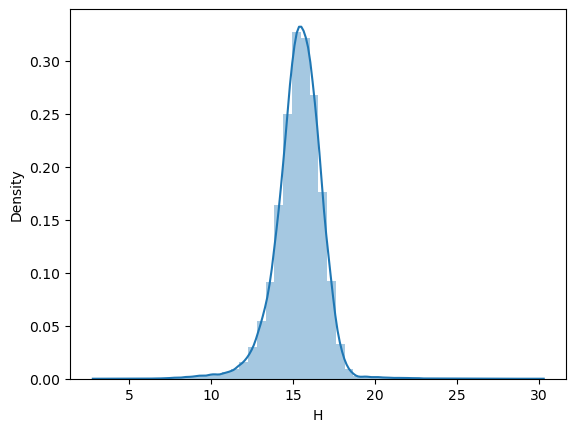

In [144]:
sns.distplot(df1['H'])

#<span style="font-size: 23px;">As it somewhat follows a normal distribution,it can be imputed with mean</span>

In [145]:
H_mean=df1['H'].mean()
H_mean

15.352341731965307

In [146]:
#imputing H with its mean
df1['H'].fillna(H_mean,inplace=True)
df1['H']

0          3.33
1          4.11
2          5.12
3          3.20
4          7.01
          ...  
139703    18.30
139704    17.10
139705    17.45
139706    16.80
139707    17.40
Name: H, Length: 139708, dtype: float64

#<span style="font-size: 23px;">Albedo </span>

<Axes: xlabel='albedo', ylabel='Density'>

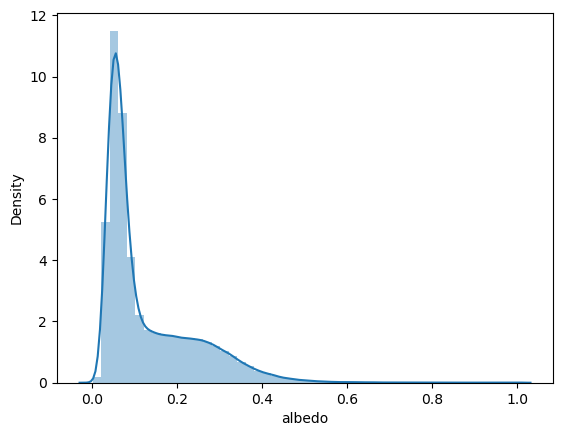

In [147]:
sns.distplot(df1['albedo'])

#<span style="font-size: 23px;">As albedo follows a skewed distribution,it can be imputed with median</span>

In [148]:
alb_med=df1['albedo'].median()
alb_med

0.078

In [149]:
#imputing albedo with its median
df1['albedo'].fillna(alb_med,inplace=True)
df1['albedo']

0         0.0900
1         0.1550
2         0.2140
3         0.4228
4         0.2740
           ...  
139703    0.0730
139704    0.0540
139705    0.0780
139706    0.1110
139707    0.0740
Name: albedo, Length: 139708, dtype: float64

#<span style="font-size: 23px;">Diameter_sigma </span>

<Axes: xlabel='diameter_sigma', ylabel='Density'>

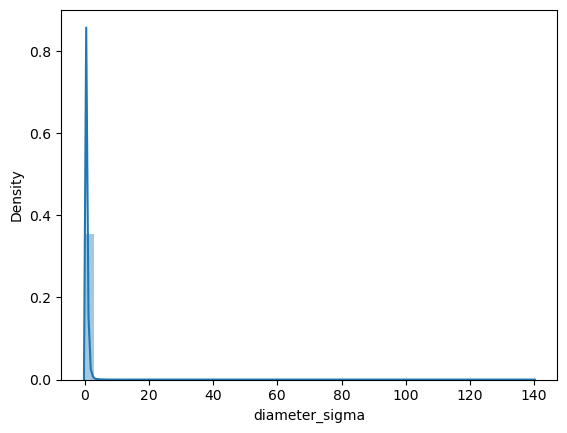

In [150]:
sns.distplot(df1['diameter_sigma'])

#<span style="font-size: 23px;">As diameter_sigma follows a skewed distribution,it can be imputed with median</span>

In [151]:
ds_med=df1['diameter_sigma'].median()
ds_med

0.34

In [152]:
#imputing diameter_sigma with its median
df1['diameter_sigma'].fillna(ds_med,inplace=True)
df1['diameter_sigma']

0          0.20
1          6.00
2         10.59
3          0.20
4          3.14
          ...  
139703     0.20
139704     0.28
139705     0.48
139706     0.85
139707     0.19
Name: diameter_sigma, Length: 139708, dtype: float64

#<span style="font-size: 23px;">Data_arc </span>

<Axes: xlabel='data_arc', ylabel='Density'>

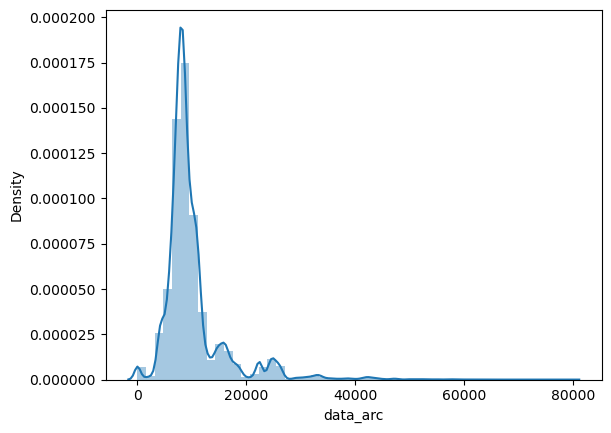

In [153]:
sns.distplot(df1['data_arc'])

#<span style="font-size: 23px;">As data_arc follows a skewed distribution,it can be imputed with median</span>

In [154]:
da_med=df1['data_arc'].median()
da_med

8550.0

In [155]:
#imputing data_arc with its median
df1['data_arc'].fillna(da_med,inplace=True)
df1['data_arc']

0          9520.0
1         79390.0
2         79466.0
3         25743.0
4         64243.0
           ...   
139703     6557.0
139704     3763.0
139705     7084.0
139706     4704.0
139707     5246.0
Name: data_arc, Length: 139708, dtype: float64

In [156]:
df1.isnull().sum()

full_name         0
neo               0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
epoch             0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
per               0
per_y             0
moid              0
moid_jup          0
class             0
data_arc          0
condition_code    0
rms               0
dtype: int64

#<span style="font-size: 25px;">Label Encoding </span>

In [157]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

df_encode=pd.DataFrame()
df_encode['neo']=df1['neo']
df_encode['pha']=df1['pha']
df_encode['class']=df1['class']

features_to_encode = [col for col in df_encode ]

for columns in features_to_encode:
    df1[columns]=label_encoder.fit_transform(df1[columns])

In [158]:
df1

,full_name,neo,pha,H,diameter,albedo,diameter_sigma,epoch,e,a,...,n,tp,per,per_y,moid,moid_jup,class,data_arc,condition_code,rms
0,1 Ceres (A801 AA),0,0,3.33,939.400,0.0900,0.20,2459800.5,0.0786,2.767,...,0.2142,2459920.37,1680.0,4.60,1.590,2.09,6,9520.0,0,0.43153
1,2 Pallas (A802 FA),0,0,4.11,513.000,0.1550,6.00,2459800.5,0.2300,2.769,...,0.2139,2460010.50,1680.0,4.61,1.230,1.85,6,79390.0,0,0.35570
2,3 Juno (A804 RA),0,0,5.12,246.596,0.2140,10.59,2459800.5,0.2568,2.670,...,0.2259,2460036.83,1590.0,4.36,1.040,2.19,6,79466.0,0,0.34530
3,4 Vesta (A807 FA),0,0,3.20,525.400,0.4228,0.20,2459800.5,0.0884,2.362,...,0.2715,2459575.12,1330.0,3.63,1.140,2.47,6,25743.0,0,0.40095
4,5 Astraea (A845 XA),0,0,7.01,106.699,0.2740,3.14,2459800.5,0.1890,2.578,...,0.2382,2460436.30,1510.0,4.14,1.100,1.96,6,64243.0,0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),0,0,18.30,1.870,0.0730,0.20,2459800.5,0.2460,2.742,...,0.2171,2460389.46,1660.0,4.54,1.120,1.82,6,6557.0,1,0.52751
139704,(2019 BY5),0,0,17.10,2.182,0.0540,0.28,2459800.5,0.2966,2.718,...,0.2200,2459982.46,1640.0,4.48,0.985,2.01,6,3763.0,0,0.42858
139705,(2019 BX6),0,0,17.45,1.688,0.0780,0.48,2459800.5,0.2423,2.681,...,0.2245,2459941.00,1600.0,4.39,1.060,2.11,6,7084.0,0,0.46238
139706,(2019 BB7),0,0,16.80,2.887,0.1110,0.85,2459800.5,0.1594,2.788,...,0.2117,2460429.02,1700.0,4.66,1.360,1.77,6,4704.0,0,0.51827


#Missing values has been Imputed

#<span style="font-size: 25px;">Feature selection based on their Importances </span>

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [160]:
X_new=df1.drop(['full_name','pha'],axis=1)
Y_new=df1['pha']
X_new_train,X_new_test,Y_new_train,Y_new_test=train_test_split(X_new,Y_new,test_size=0.30,random_state=42)

In [161]:
mutualinfo=mutual_info_classif(X_new_train,Y_new_train)
mutualinfo

array([0.01228642, 0.00876831, 0.00980676, 0.00107311, 0.00388712,
       0.02109978, 0.00854031, 0.00795373, 0.01299229, 0.00106431,
       0.        , 0.00017626, 0.00014932, 0.00568052, 0.00796675,
       0.0011505 , 0.00802398, 0.00798691, 0.01580914, 0.00598771,
       0.02619581, 0.00324222, 0.00095031, 0.00248215])

In [162]:
mutualinfo=pd.Series(mutualinfo)
mutualinfo.index=X_new_train.columns
mutualinfo.sort_values(ascending=False)

class             0.026196
epoch             0.021100
moid              0.015809
q                 0.012992
neo               0.012286
diameter          0.009807
H                 0.008768
e                 0.008540
per               0.008024
per_y             0.007987
n                 0.007967
a                 0.007954
moid_jup          0.005988
ad                0.005681
diameter_sigma    0.003887
data_arc          0.003242
rms               0.002482
tp                0.001151
albedo            0.001073
i                 0.001064
condition_code    0.000950
w                 0.000176
ma                0.000149
om                0.000000
dtype: float64

#<span style="font-size: 23px;">From the information provided by the features we can conclude that there are certain features that are not important for PHA Classification. Hence features like 'condition_code,w,ma,om' can be dropped </span>

In [163]:
df1.drop(['condition_code','w','ma','om'],axis=1,inplace=True)
df1

,full_name,neo,pha,H,diameter,albedo,diameter_sigma,epoch,e,a,...,ad,n,tp,per,per_y,moid,moid_jup,class,data_arc,rms
0,1 Ceres (A801 AA),0,0,3.33,939.400,0.0900,0.20,2459800.5,0.0786,2.767,...,2.98,0.2142,2459920.37,1680.0,4.60,1.590,2.09,6,9520.0,0.43153
1,2 Pallas (A802 FA),0,0,4.11,513.000,0.1550,6.00,2459800.5,0.2300,2.769,...,3.41,0.2139,2460010.50,1680.0,4.61,1.230,1.85,6,79390.0,0.35570
2,3 Juno (A804 RA),0,0,5.12,246.596,0.2140,10.59,2459800.5,0.2568,2.670,...,3.36,0.2259,2460036.83,1590.0,4.36,1.040,2.19,6,79466.0,0.34530
3,4 Vesta (A807 FA),0,0,3.20,525.400,0.4228,0.20,2459800.5,0.0884,2.362,...,2.57,0.2715,2459575.12,1330.0,3.63,1.140,2.47,6,25743.0,0.40095
4,5 Astraea (A845 XA),0,0,7.01,106.699,0.2740,3.14,2459800.5,0.1890,2.578,...,3.06,0.2382,2460436.30,1510.0,4.14,1.100,1.96,6,64243.0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),0,0,18.30,1.870,0.0730,0.20,2459800.5,0.2460,2.742,...,3.42,0.2171,2460389.46,1660.0,4.54,1.120,1.82,6,6557.0,0.52751
139704,(2019 BY5),0,0,17.10,2.182,0.0540,0.28,2459800.5,0.2966,2.718,...,3.52,0.2200,2459982.46,1640.0,4.48,0.985,2.01,6,3763.0,0.42858
139705,(2019 BX6),0,0,17.45,1.688,0.0780,0.48,2459800.5,0.2423,2.681,...,3.33,0.2245,2459941.00,1600.0,4.39,1.060,2.11,6,7084.0,0.46238
139706,(2019 BB7),0,0,16.80,2.887,0.1110,0.85,2459800.5,0.1594,2.788,...,3.23,0.2117,2460429.02,1700.0,4.66,1.360,1.77,6,4704.0,0.51827


#<span style="font-size: 25px;">Visualizations</span>

In [164]:
#PHA
df1['pha'].value_counts()

0    139367
1       341
Name: pha, dtype: int64

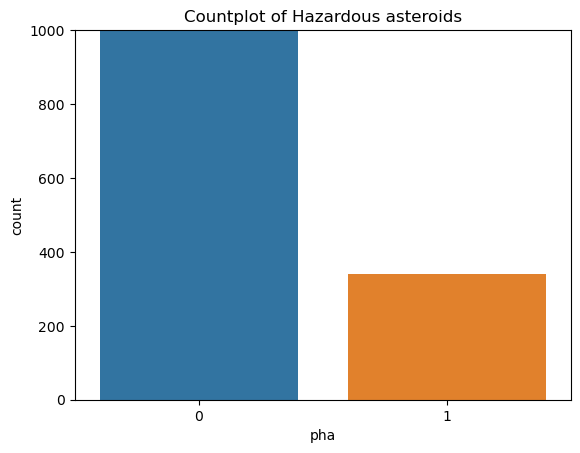

In [165]:
sns.countplot(x=df1['pha'])
plt.title('Countplot of Hazardous asteroids')
plt.ylim(0,1000)
plt.show()

#<span style="font-size: 20px;">Observations:

   - Almost 99% of the asteroids are non-hazardous.
   - Only a minor percent of asteroids are hazardous.
</span>

In [166]:
#NEO
df1['neo'].value_counts()

0    138460
1      1248
Name: neo, dtype: int64

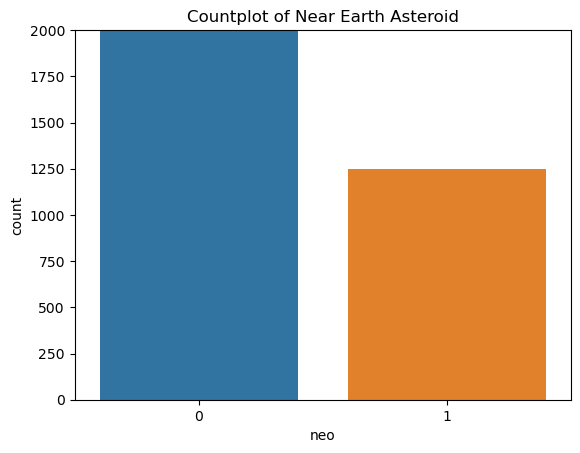

In [167]:
sns.countplot(x=df1['neo'])
plt.title('Countplot of Near Earth Asteroid')
plt.ylim(0,2000)
plt.show()

#<span style="font-size: 20px;">Observations:

   - Almost 99% of the asteroids are not near earth objects.
   - Only a minor percent of asteroids are nearer to earth.
</span>

In [168]:
#to check whether neo and pha replicate the same.
if df1['pha'].equals(df1['neo']):
    print('Yes.Both the features are same.So NEO can be removed')
else:
    print('No.They are not the same and neo has to be retained.')

No.They are not the same and neo has to be retained.


#<span style="font-size: 25px;">Correlation between features</span>

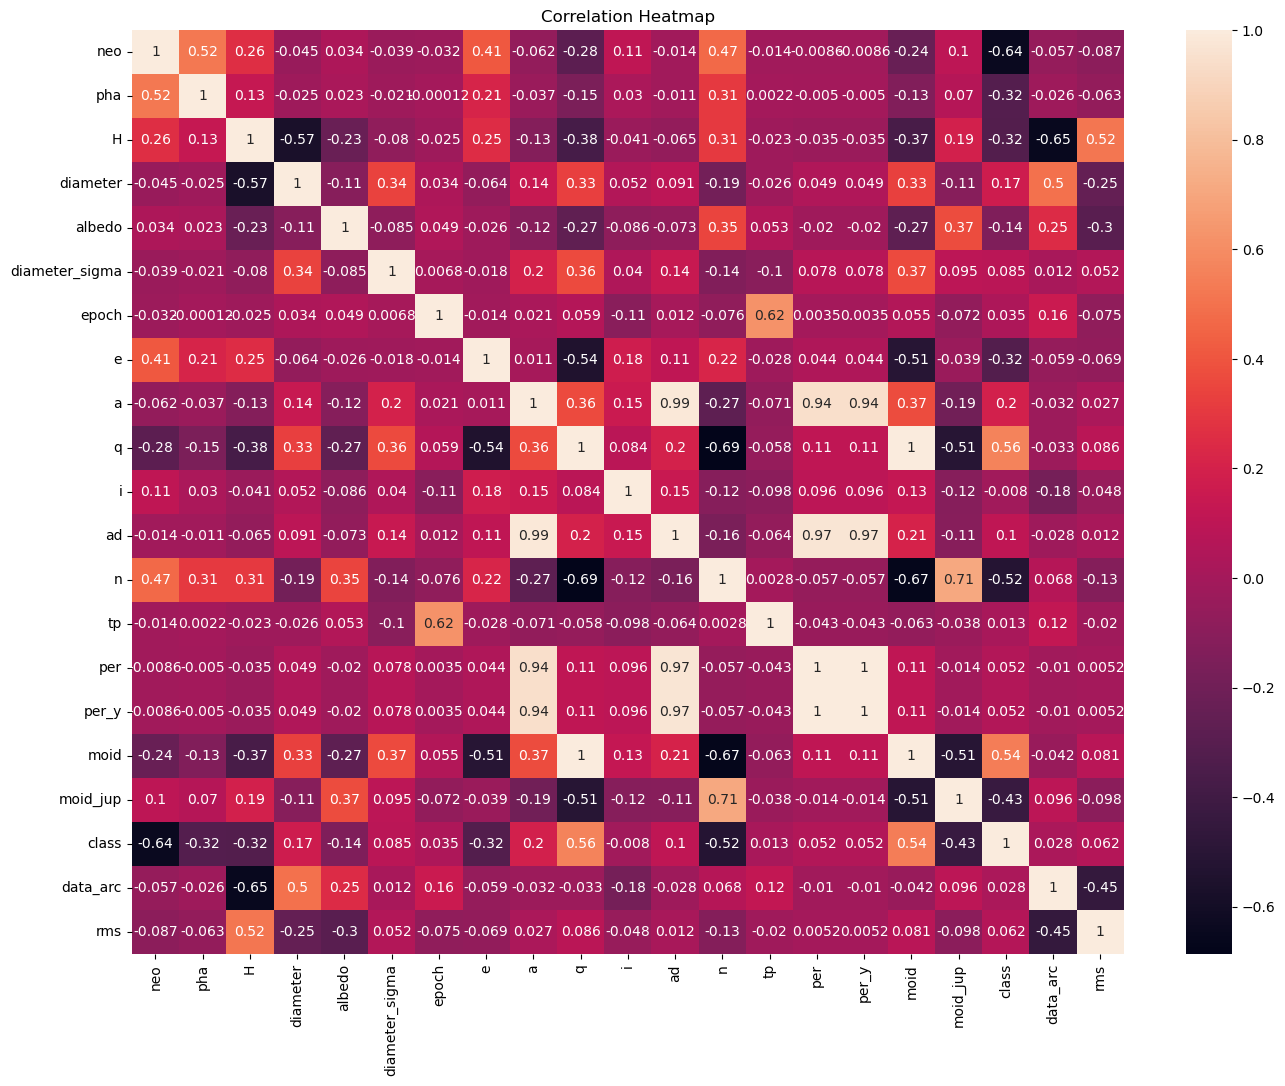

In [169]:
df_new=df1.drop('full_name',axis=1)
corr_matrix=df_new.corr()
plt.figure(figsize=(16,12))
heatmap=sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Heatmap')
plt.show()

#<span style="font-size: 20px;">Certain features like H and Diameter ,H and data_arc,neo and moid,neo and class have significant negative correlation and features like pha and neo,moid and a,per_y and a,per and class have significant positive correlation</span>

#<span style="font-size: 25px;">Correlation between independent continuous variables and PHA using PointBiserialr correlation</span>

In [170]:
from scipy.stats import pointbiserialr
cont_var=['H', 'diameter', 'albedo', 'diameter_sigma','epoch', 'e', 'a', 'q', 'i', 'ad', 'n', 'tp', 'per', 'per_y', 'moid','moid_jup', 'class', 'data_arc', 'rms']
results=[]
for var in cont_var:
    pbsr_corr,p_value = pointbiserialr(df1['pha'],df1[var])   
    results.append({'Variable': var, 'Point Biserial Correlation': pbsr_corr, 'P-value': p_value})

In [171]:
results

[{'Variable': 'H',
  'Point Biserial Correlation': 0.1341339827341964,
  'P-value': 0.0},
 {'Variable': 'diameter',
  'Point Biserial Correlation': -0.02475602060340267,
  'P-value': 2.151845255491887e-20},
 {'Variable': 'albedo',
  'Point Biserial Correlation': 0.023331042316691402,
  'P-value': 2.7411090738676577e-18},
 {'Variable': 'diameter_sigma',
  'Point Biserial Correlation': -0.021368904010716807,
  'P-value': 1.3713458008148583e-15},
 {'Variable': 'epoch',
  'Point Biserial Correlation': -0.00012267601528664083,
  'P-value': 0.9634275281880321},
 {'Variable': 'e',
  'Point Biserial Correlation': 0.21220382193045229,
  'P-value': 0.0},
 {'Variable': 'a',
  'Point Biserial Correlation': -0.03696450098985056,
  'P-value': 1.9035830169349794e-43},
 {'Variable': 'q',
  'Point Biserial Correlation': -0.15464504131266896,
  'P-value': 0.0},
 {'Variable': 'i',
  'Point Biserial Correlation': 0.029984514945476312,
  'P-value': 3.6463767824084827e-29},
 {'Variable': 'ad',
  'Point Bise

#<span style="font-size: 20px;">From the above,we can infer that there is a significant correlation between most of the independent variables and 'PHA' except for tp and epoch</span>

#<span style="font-size: 20px;">For Categorical independent features like neo and class,neo has significant correlation with pha whereas class and pha has less significant correlation</span>

In [172]:
#Dropping 'tp' and 'epoch'
df1.drop(['tp','epoch'],axis=1,inplace=True)
df1

,full_name,neo,pha,H,diameter,albedo,diameter_sigma,e,a,q,i,ad,n,per,per_y,moid,moid_jup,class,data_arc,rms
0,1 Ceres (A801 AA),0,0,3.33,939.400,0.0900,0.20,0.0786,2.767,2.549,10.59,2.98,0.2142,1680.0,4.60,1.590,2.09,6,9520.0,0.43153
1,2 Pallas (A802 FA),0,0,4.11,513.000,0.1550,6.00,0.2300,2.769,2.133,34.93,3.41,0.2139,1680.0,4.61,1.230,1.85,6,79390.0,0.35570
2,3 Juno (A804 RA),0,0,5.12,246.596,0.2140,10.59,0.2568,2.670,1.985,12.99,3.36,0.2259,1590.0,4.36,1.040,2.19,6,79466.0,0.34530
3,4 Vesta (A807 FA),0,0,3.20,525.400,0.4228,0.20,0.0884,2.362,2.153,7.14,2.57,0.2715,1330.0,3.63,1.140,2.47,6,25743.0,0.40095
4,5 Astraea (A845 XA),0,0,7.01,106.699,0.2740,3.14,0.1890,2.578,2.090,5.37,3.06,0.2382,1510.0,4.14,1.100,1.96,6,64243.0,0.52133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139703,(2019 AR40),0,0,18.30,1.870,0.0730,0.20,0.2460,2.742,2.067,13.47,3.42,0.2171,1660.0,4.54,1.120,1.82,6,6557.0,0.52751
139704,(2019 BY5),0,0,17.10,2.182,0.0540,0.28,0.2966,2.718,1.912,16.56,3.52,0.2200,1640.0,4.48,0.985,2.01,6,3763.0,0.42858
139705,(2019 BX6),0,0,17.45,1.688,0.0780,0.48,0.2423,2.681,2.031,16.72,3.33,0.2245,1600.0,4.39,1.060,2.11,6,7084.0,0.46238
139706,(2019 BB7),0,0,16.80,2.887,0.1110,0.85,0.1594,2.788,2.344,8.65,3.23,0.2117,1700.0,4.66,1.360,1.77,6,4704.0,0.51827


#<span style="font-size: 25px;">Outliers Detection</span>

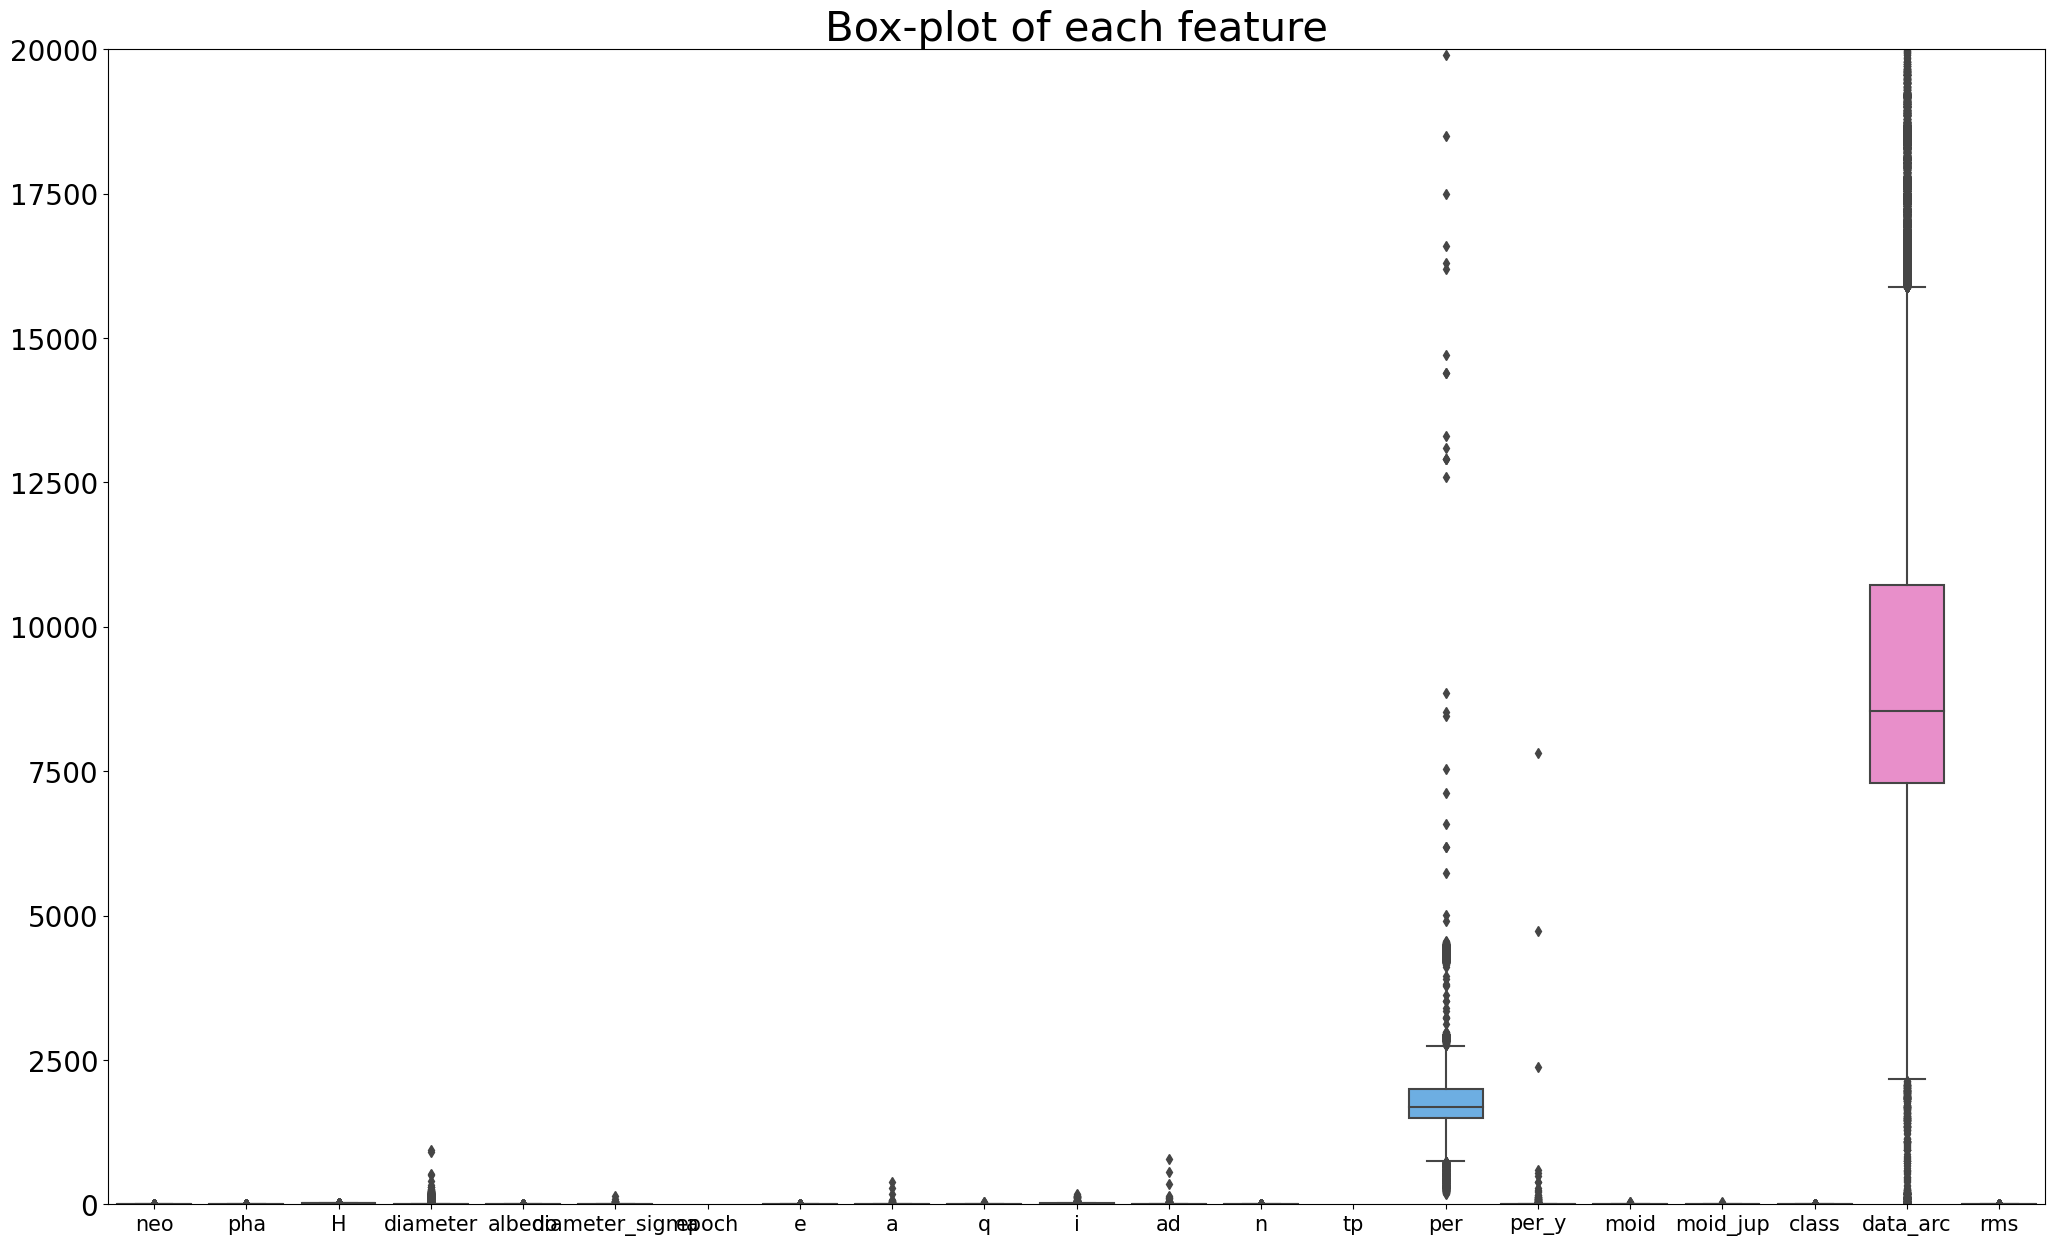

In [173]:
plt.figure(figsize=(25,15))

sns.boxplot(data=df_new)
plt.title('Box-plot of each feature',fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.ylim(0,20000)
plt.show()

#<span style="font-size: 18px;">As outliers in this case are considered to be actual values,they can be retained</span>

#<span style="font-size: 25px;">Checking the prevalance rate of the target variable</span>

In [174]:
class_count=np.bincount(df1['pha'])
total_obs=len(df1)
class_prop=class_count/total_obs

print(class_count[0],class_count[1])
print(class_prop[0],class_prop[1])

139367 341
0.9975591948922038 0.002440805107796261


#<span style="font-size: 18px;">There is a huge imbalancement between the classes of target variable.It has to be balanced to have an unbiased estimation. Here i am using SMOTE technique to balance it.</span>

#<span style="font-size: 25px;">SMOTE technique</span>

In [175]:
!pip install imbalanced-learn

In [176]:
from imblearn.over_sampling import SMOTE

In [177]:
x1=df1.drop(['full_name','pha'],axis=1)
y1=df1['pha']

In [178]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=42)

In [182]:
sm=SMOTE(random_state=25)
xtrain_resampled,ytrain_resampled =sm.fit_resample(X_train,y_train)

unique,counts=np.unique(ytrain_resampled,return_counts=True)
class_dist=dict(zip(unique,counts))
print(class_dist)

{0: 111486, 1: 111486}


In [183]:
#Result of smote

#{0: 111486, 1: 111486}

In [184]:
xtrain_resampled

,neo,H,diameter,albedo,diameter_sigma,e,a,q,i,ad,n,per,per_y,moid,moid_jup,class,data_arc,rms
0,0,16.040000,5.219000,0.026000,1.120000,0.043300,3.072000,2.939000,2.380000,3.200000,0.183100,1970.000000,5.380000,1.950000,1.970000,6,9480.000000,0.546950
1,0,17.120000,2.989000,0.065000,0.860000,0.099600,2.715000,2.445000,5.110000,2.990000,0.220300,1630.000000,4.470000,1.430000,2.210000,6,9914.000000,0.611330
2,0,13.310000,5.424000,0.264000,0.060000,0.209300,2.360000,1.866000,25.510000,2.850000,0.271900,1320.000000,3.630000,0.907000,2.220000,6,16547.000000,0.374280
3,0,16.540000,1.626000,0.202000,0.210000,0.145600,2.539000,2.170000,2.930000,2.910000,0.243500,1480.000000,4.050000,1.160000,2.370000,6,6791.000000,0.535850
4,0,15.900000,4.348000,0.049000,0.290000,0.089200,2.933000,2.671000,13.060000,3.190000,0.196200,1830.000000,5.020000,1.690000,1.850000,6,6443.000000,0.571870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222967,1,19.231637,0.755230,0.060315,0.177288,0.673388,2.921862,0.953828,18.215315,4.890128,0.197414,1822.327419,4.994655,0.010136,0.763425,1,3702.892501,0.417550
222968,1,20.829487,0.377223,0.093208,0.110009,0.605192,2.518337,0.987698,18.111195,4.050952,0.250119,1460.242590,4.010028,0.029623,1.101894,1,3930.366116,0.401564
222969,1,21.232454,0.165789,0.244748,0.010000,0.618106,2.287537,0.872868,4.428486,3.698328,0.285452,1264.825319,3.463270,0.029695,1.591905,1,3930.576587,0.500632
222970,1,17.776977,1.674162,0.123960,0.073826,0.489734,1.151302,0.587376,24.378468,1.717315,0.800850,451.516743,1.234966,0.021839,3.799195,1,6334.436395,0.424914


In [185]:
xtrain_resampled.columns

Index(['neo', 'H', 'diameter', 'albedo', 'diameter_sigma', 'e', 'a', 'q', 'i',
       'ad', 'n', 'per', 'per_y', 'moid', 'moid_jup', 'class', 'data_arc',
       'rms'],
      dtype='object')

In [186]:
ytrain_resampled

0         0
1         0
2         0
3         0
4         0
         ..
222967    1
222968    1
222969    1
222970    1
222971    1
Name: pha, Length: 222972, dtype: int32

In [187]:
 ytrain_resampled.value_counts()

0    111486
1    111486
Name: pha, dtype: int64

# Model Building using SMOTE data

In [189]:
!pip install xgboost

  Using cached xgboost-2.0.0-py3-none-win_amd64.whl (99.7 MB)


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [191]:
#Logistic Regression
log_reg=LogisticRegression(random_state=42)
log_reg.fit(xtrain_resampled,ytrain_resampled)
log_pred=log_reg.predict(X_test)


#Decision Tree Classifier
dt_classifier=DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=5,random_state=42)
dt_classifier.fit(xtrain_resampled,ytrain_resampled)
dtc_pred=dt_classifier.predict(X_test)

#Random Forest Classifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(xtrain_resampled,ytrain_resampled)
rfc_pred=rf_classifier.predict(X_test)


#XGBoost Classifier
xgb_classifier=xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(xtrain_resampled,ytrain_resampled)
xgb_pred=xgb_classifier.predict(X_test)

In [ ]:
#Logistic Regression
acc_log=accuracy_score(y_test,log_pred)

#Decision Tree Classifier
acc_dt=accuracy_score(y_test,dtc_pred)

#Random Forest Classifier
acc_rf=accuracy_score(y_test,rfc_pred)

#XGBoost Classifier
acc_xgb=accuracy_score(y_test,xgb_pred)

print('Accuracy score of Logistic Regression is : ',acc_log)
print('Accuracy score of Decision Tree Classifier is : ',acc_dt)
print('Accuracy score of Random Forest Classifier is : ',acc_rf)
print('Accuracy score of XGBoost Classifier is : ',acc_xgb)      

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score, classification_report, accuracy_score
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "XGBoost": xgb_classifier
}

roc_curves = {}
auc_scores = {}

for model_name, model in models.items():
    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[model_name] = (fpr, tpr)
    
    # Calculate AUC score
    auc = roc_auc_score(y_test, y_prob)
    auc_scores[model_name] = auc
    
    # Calculate predictions and metrics
    y_pred = model.predict(X_test)
    classification_rep = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend()
    plt.show()
    
    # Print classification report and accuracy
    print(f"{model_name} Classification Report:\n{classification_rep}")
    print(f"{model_name} Accuracy: {accuracy:.4f}\n")

#<span style="font-size: 20px;">On a whole all the models like Logistic Regression,DT classifier,RF classifier,XGB Classifier well classifies the whether a asteroid is hazardous to earth or not </span>